<h1>Galaxies, Stars and Quasars classification</h1>
The Dataset are made in this way:
<ul>
    <li>objid       = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS</li>
    <li>ra          = Right Ascension angle (at J2000 epoch)</li>
    <li>dec         = Declination angle (at J2000 epoch)</li>
    <li>u           = Ultraviolet filter in the photometric system</li>
    <li>g           = Green filter in the photometric system</li>
    <li>r           = Red filter in the photometric system</li>
    <li>i           = Near Infrared filter in the photometric system</li>
    <li>z           = Infrared filter in the photometric system</li>
    <li>run         = Run Number used to identify the specific scan</li>
    <li>rereun      = Rerun Number to specify how the image was processed</li>
    <li>camcol      = Camera column to identify the scanline within the run</li>
    <li>field       = Field number to identify each field</li>
    <li>specobjid   = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)</li>
    <li>redshift    = redshift value based on the increase in wavelength</li>
    <li>plate       = plate ID, identifies each plate in SDSS</li>
    <li>mjd         = Modified Julian Date, used to indicate when a given piece of SDSS data was taken</li>
    <li>fiberid     = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation</li>
    <li>class       = object class (galaxy, star or quasar object)</li>
</ul>

In [67]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression, f_regression, SelectKBest
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats import pearsonr
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.model_selection import StratifiedKFold


Let's start loading the dataset in a dataframe

In [68]:
# dfStars = pd.read_csv('Skyserver_12_15_2020 3 45 07 AM.csv', na_values="?")
dfStars = pd.read_csv('FileCSV/star_classification.csv', na_values="?")
dfStars

objid          ra        dec         u         g         r  \
0      1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1      1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2      1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3      1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4      1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   
...             ...         ...        ...       ...       ...       ...   
99995  1.237679e+18   39.620709  -2.594074  22.16759  22.97586  21.90404   
99996  1.237679e+18   29.493819  19.798874  22.69118  22.38628  20.45003   
99997  1.237668e+18  224.587407  15.700707  21.16916  19.26997  18.20428   
99998  1.237661e+18  212.268621  46.660365  25.35039  21.63757  19.91386   
99999  1.237661e+18  196.896053  49.464643  22.62171  21.79745  20.60115   

              i         z   run  rerun  camcol  field     specobjid   class  \
0      19.16573  18.79371  3606    301       2     79  6.543777e+18  GALAXY   
1      21.16812  21.61427  4518    301       5    119  1.176014e+19  GALAXY   
2      19.34857  18.94827  3606    301       2    120  5.152200e+18  GALAXY   
3      20.50454  19.25010  4192    301       3    214  1.030107e+19  GALAXY   
4      15.97711  15.54461  8102    301       3    137  6.891865e+18  GALAXY   
...         ...       ...   ...    ...     ...    ...           ...     ...   
99995  21.30548  20.73569  7778    301       2    581  1.055431e+19  GALAXY   
99996  19.75759  19.41526  7917    301       1    289  8.586351e+18  GALAXY   
99997  17.69034  17.35221  5314    301       4    308  3.112008e+18  GALAXY   
99998  19.07254  18.62482  3650    301       4    131  7.601080e+18  GALAXY   
99999  20.00959  19.28075  3650    301       4     60  8.343152e+18  GALAXY   

       redshift  plate    mjd  fiberid  
0      0.634794   5812  56354      171  
1      0.779136  10445  58158      427  
2      0.644195   4576  55592      299  
3      0.932346   9149  58039      775  
4      0.116123   6121  56187      842  
...         ...    ...    ...      ...  
99995  0.000000   9374  57749      438  
99996  0.404895   7626  56934      866  
99997  0.143366   2764  54535       74  
99998  0.455040   6751  56368      470  
99999  0.542944   7410  57104      851  

[100000 rows x 18 columns]

In [10]:
dfStars.head().T

0                       1  \
objid      1237660961327743232.0   1237664879951151104.0   
ra                    135.689107              144.826101   
dec                    32.494632               31.274185   
u                       23.87882                24.77759   
g                        22.2753                22.83188   
r                       20.39501                22.58444   
i                       19.16573                21.16812   
z                       18.79371                21.61427   
run                         3606                    4518   
rerun                        301                     301   
camcol                         2                       5   
field                         79                     119   
specobjid  6543777369295181824.0  11760142036707334144.0   
class                     GALAXY                  GALAXY   
redshift                0.634794                0.779136   
plate                       5812                   10445   
mjd                        56354                   58158   
fiberid                      171                     427   

                               2                       3  \
objid      1237660961330430208.0   1237663478724297984.0   
ra                     142.18879              338.741038   
dec                    35.582444               -0.402828   
u                       25.26307                22.13682   
g                       22.66389                23.77656   
r                       20.60976                21.61162   
i                       19.34857                20.50454   
z                       18.94827                 19.2501   
run                         3606                    4192   
rerun                        301                     301   
camcol                         2                       3   
field                        120                     214   
specobjid  5152200256025548800.0  10301071412954419200.0   
class                     GALAXY                  GALAXY   
redshift                0.644195                0.932346   
plate                       4576                    9149   
mjd                        55592                   58039   
fiberid                      299                     775   

                               4  
objid      1237680272041378048.0  
ra                    345.282593  
dec                    21.183866  
u                       19.43718  
g                       17.58028  
r                       16.49747  
i                       15.97711  
z                       15.54461  
run                         8102  
rerun                        301  
camcol                         3  
field                        137  
specobjid  6891864880783316992.0  
class                     GALAXY  
redshift                0.116123  
plate                       6121  
mjd                        56187  
fiberid                      842

Check same info about the feature of the DataSet

In [11]:
dfStars.drop('class', axis=1).describe()

objid             ra            dec              u  \
count  1.000000e+05  100000.000000  100000.000000  100000.000000   
mean   1.237665e+18     177.629117      24.135305      21.980468   
std    8.438560e+12      96.502241      19.644665      31.769291   
min    1.237646e+18       0.005528     -18.785328   -9999.000000   
25%    1.237659e+18     127.518222       5.146771      20.352353   
50%    1.237663e+18     180.900700      23.645922      22.179135   
75%    1.237668e+18     233.895005      39.901550      23.687440   
max    1.237681e+18     359.999810      83.000519      32.781390   

                   g              r              i              z  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       20.531387      19.645762      19.084854      18.668810   
std        31.750292       1.854760       1.757895      31.728152   
min     -9999.000000       9.822070       9.469903   -9999.000000   
25%        18.965230      18.135828      17.732285      17.460677   
50%        21.099835      20.125290      19.405145      19.004595   
75%        22.123767      21.044785      20.396495      19.921120   
max        31.602240      29.571860      32.141470      29.383740   

                 run     rerun         camcol          field     specobjid  \
count  100000.000000  100000.0  100000.000000  100000.000000  1.000000e+05   
mean     4481.366060     301.0       3.511610     186.130520  5.783882e+18   
std      1964.764593       0.0       1.586912     149.011073  3.324016e+18   
min       109.000000     301.0       1.000000      11.000000  2.995191e+17   
25%      3187.000000     301.0       2.000000      82.000000  2.844138e+18   
50%      4188.000000     301.0       4.000000     146.000000  5.614883e+18   
75%      5326.000000     301.0       5.000000     241.000000  8.332144e+18   
max      8162.000000     301.0       6.000000     989.000000  1.412694e+19   

            redshift          plate            mjd        fiberid  
count  100000.000000  100000.000000  100000.000000  100000.000000  
mean        0.576661    5137.009660   55588.647500     449.312740  
std         0.730707    2952.303351    1808.484233     272.498404  
min        -0.009971     266.000000   51608.000000       1.000000  
25%         0.054517    2526.000000   54234.000000     221.000000  
50%         0.424173    4987.000000   55868.500000     433.000000  
75%         0.704154    7400.250000   56777.000000     645.000000  
max         7.011245   12547.000000   58932.000000    1000.000000

In [12]:
dfStars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   objid      100000 non-null  float64
 1   ra         100000 non-null  float64
 2   dec        100000 non-null  float64
 3   u          100000 non-null  float64
 4   g          100000 non-null  float64
 5   r          100000 non-null  float64
 6   i          100000 non-null  float64
 7   z          100000 non-null  float64
 8   run        100000 non-null  int64  
 9   rerun      100000 non-null  int64  
 10  camcol     100000 non-null  int64  
 11  field      100000 non-null  int64  
 12  specobjid  100000 non-null  float64
 13  class      100000 non-null  object 
 14  redshift   100000 non-null  float64
 15  plate      100000 non-null  int64  
 16  mjd        100000 non-null  int64  
 17  fiberid    100000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 13.7+ MB


Check for Nan or Null value, but how we can see this datasets have no Null or Nan value.

In [13]:
dfStars.isna().sum(axis=0)

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

Checking if there is some duplicate, but how we can see this datasets have no duplicate.

In [14]:
dfStars[dfStars.duplicated(keep=False)]

Empty DataFrame
Columns: [objid, ra, dec, u, g, r, i, z, run, rerun, camcol, field, specobjid, class, redshift, plate, mjd, fiberid]
Index: []

In the following heatmap we can see the correlation between the most important feature of my datasets. We can see that the (u, g) feature pair have a very high correlation, this is because of same oulier inside the datasets.

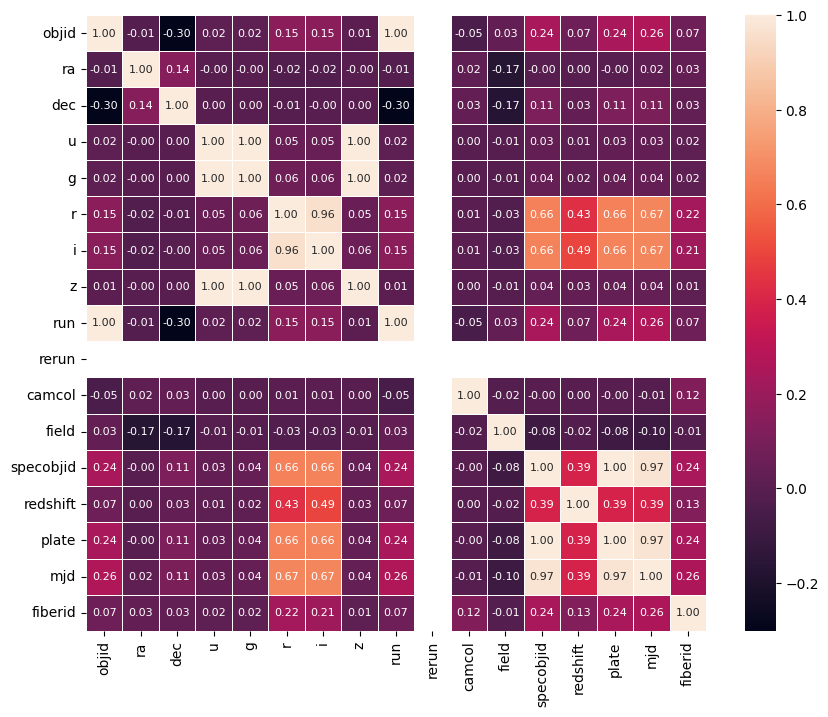

In [11]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(dfStars.drop(['class'], axis = 1).corr(), annot=True, linewidths=.5, fmt='.2f', ax=ax, annot_kws={'fontsize': 8})
plt.show()

Show the relationship between all pairs of relevant variables into the dataset

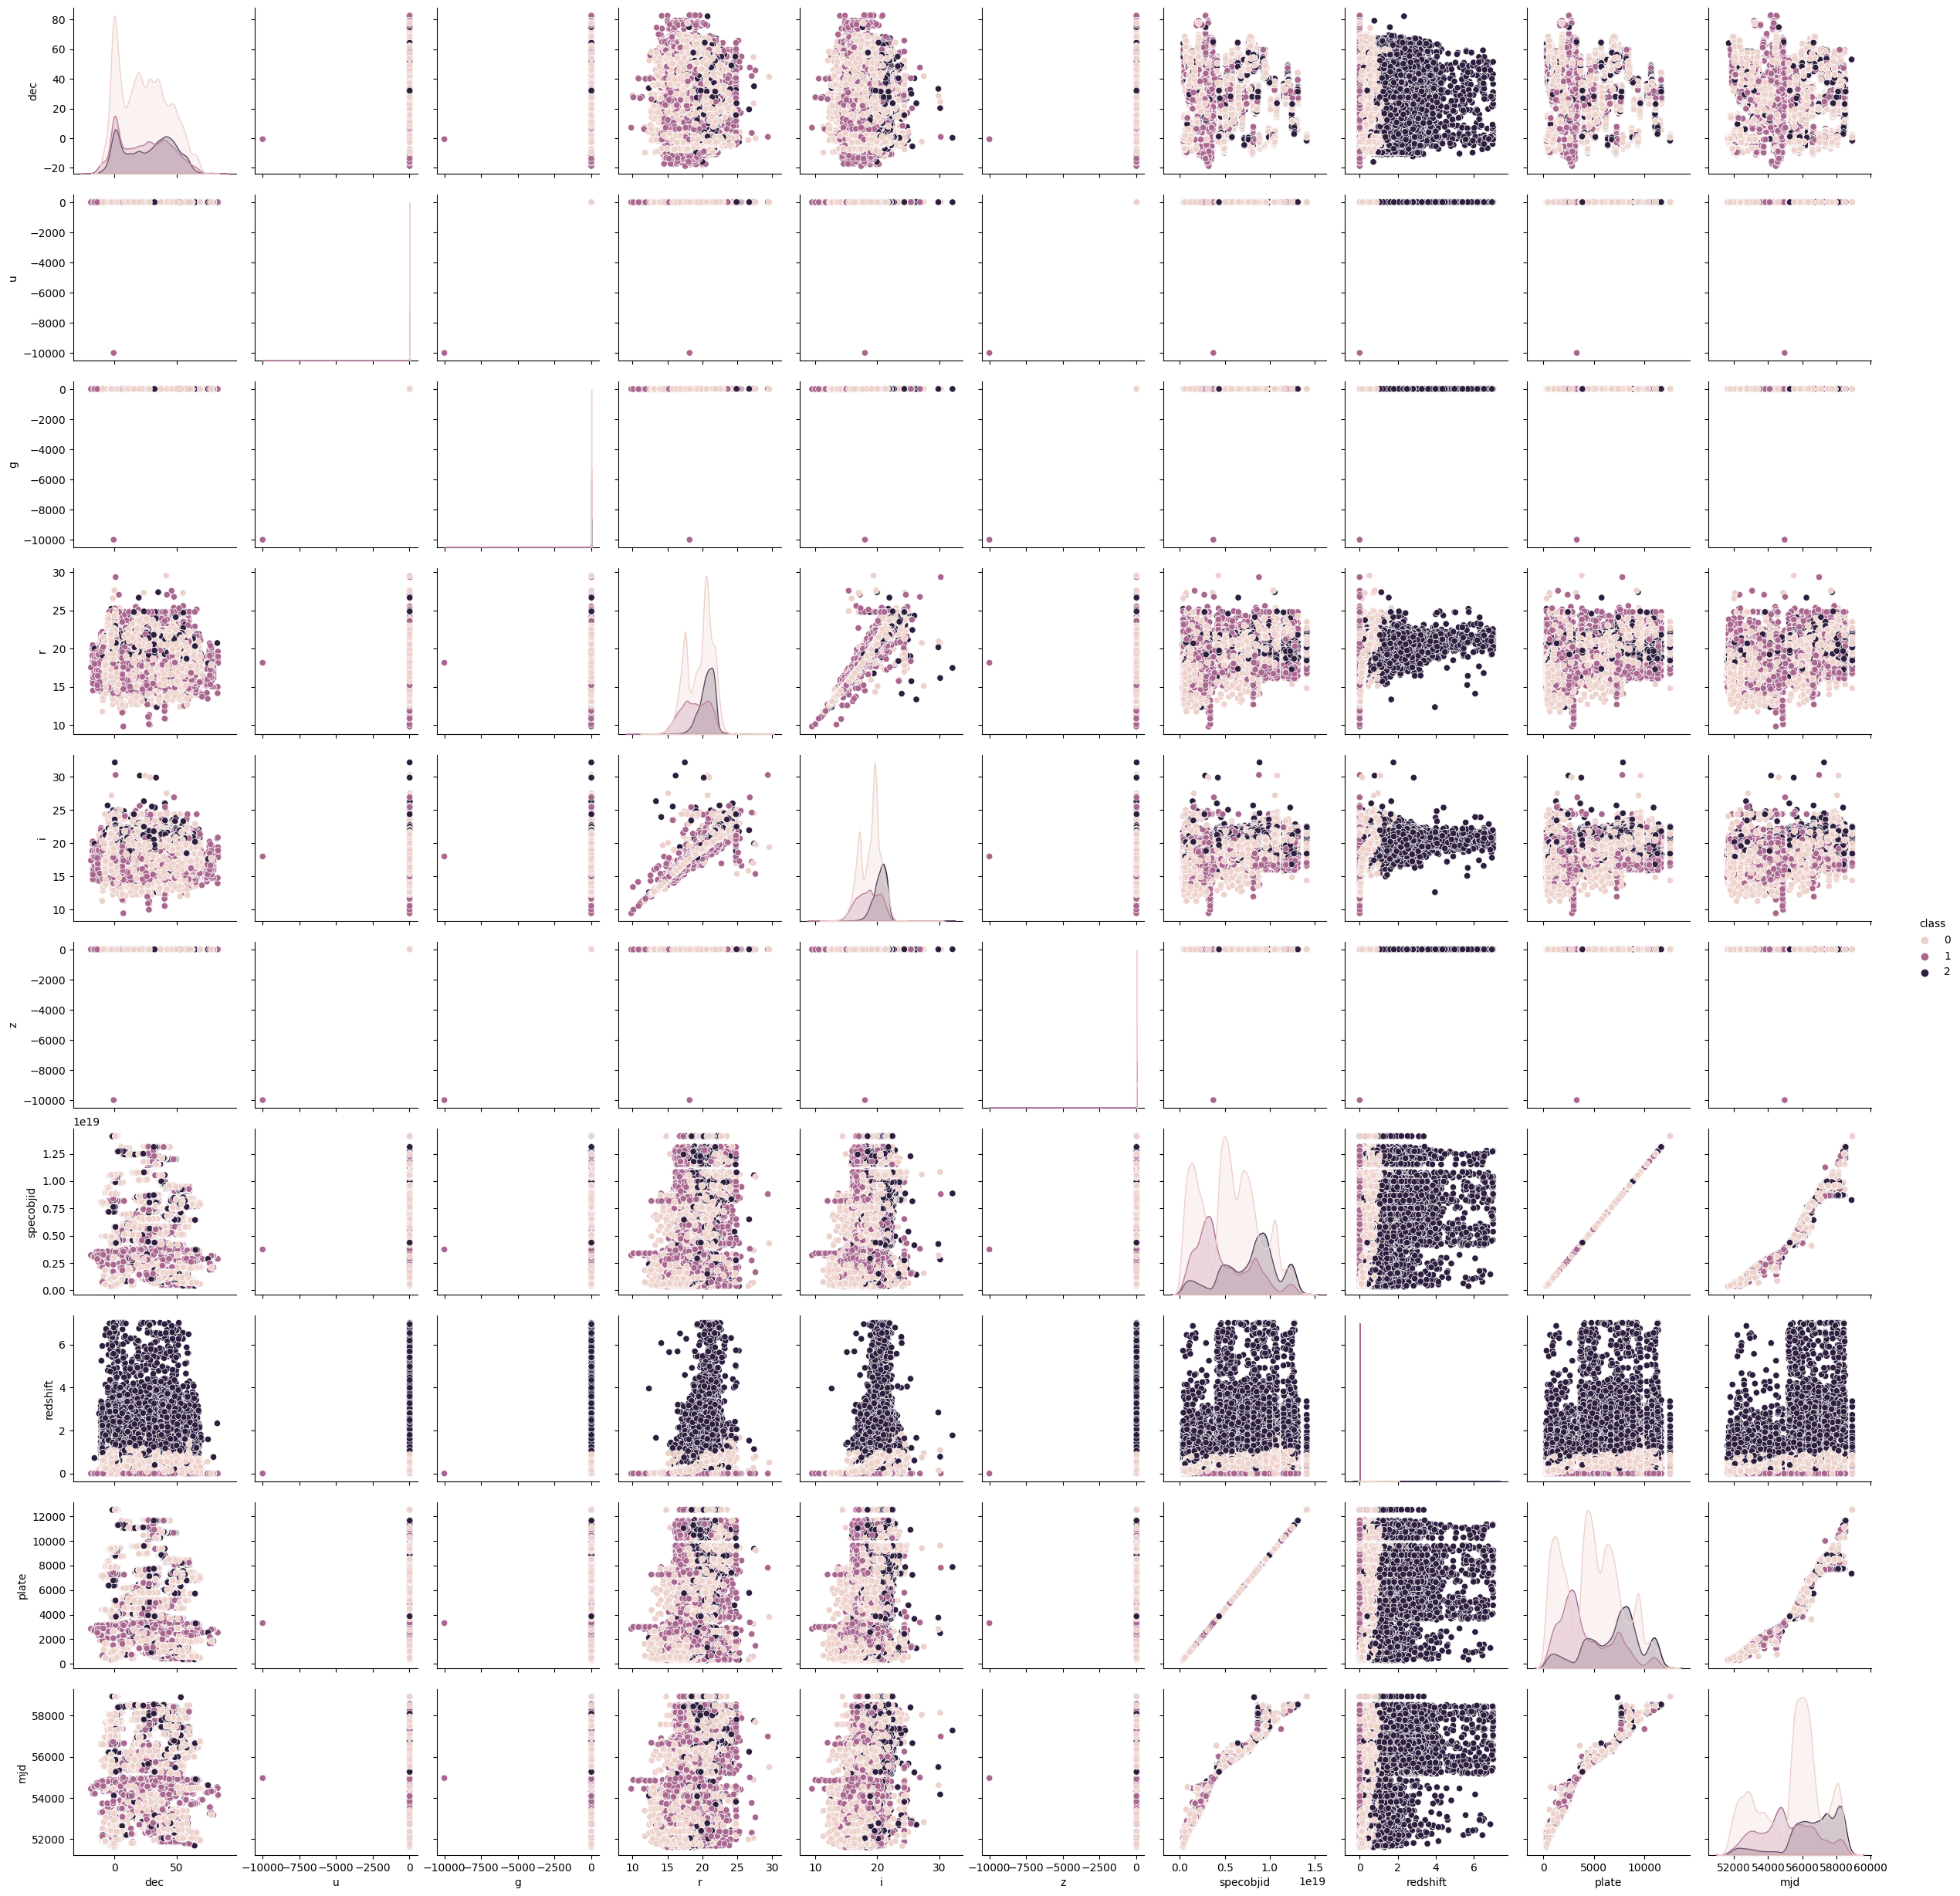

In [6]:
sns.pairplot(data=dfStars.drop(['objid', 'ra', 'run','rerun','camcol','field','fiberid'], axis = 1), hue="class")

In [7]:
dfStars.keys()

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

<h3>Distribution of each useful attribute divided by class</h3>
This distribution will be useful for make a comparison with the dataset after the rebalance part

dec


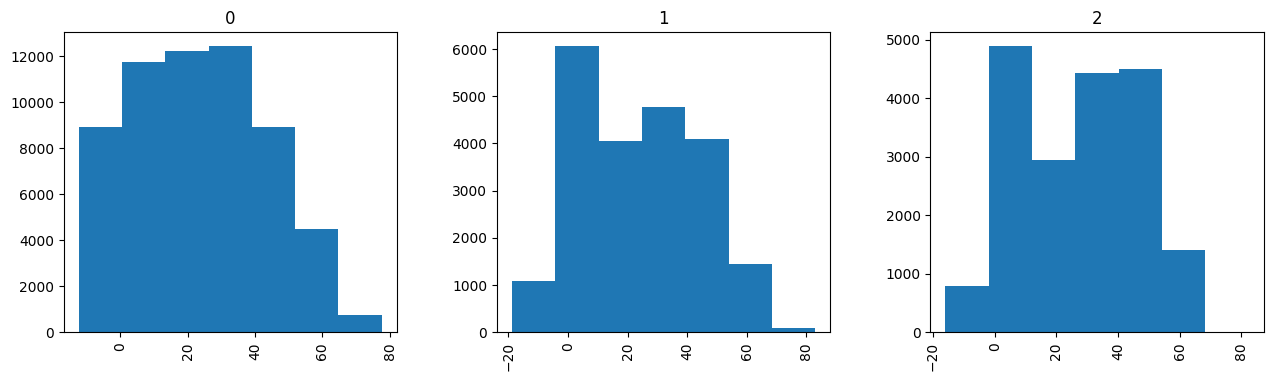

u


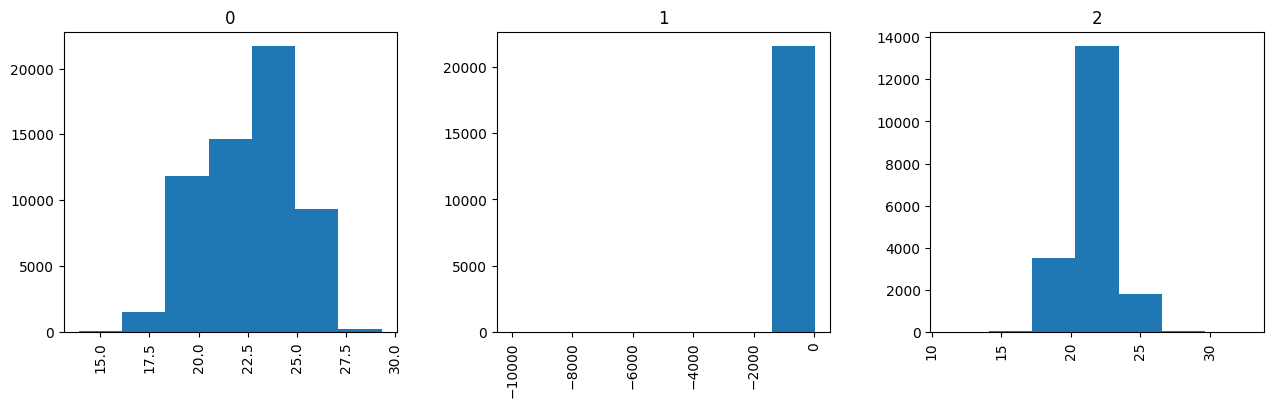

g


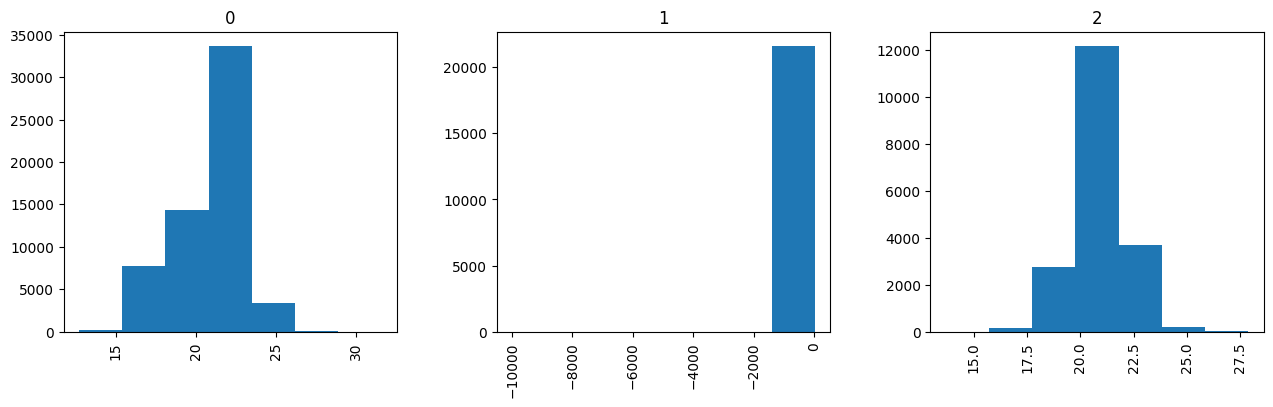

r


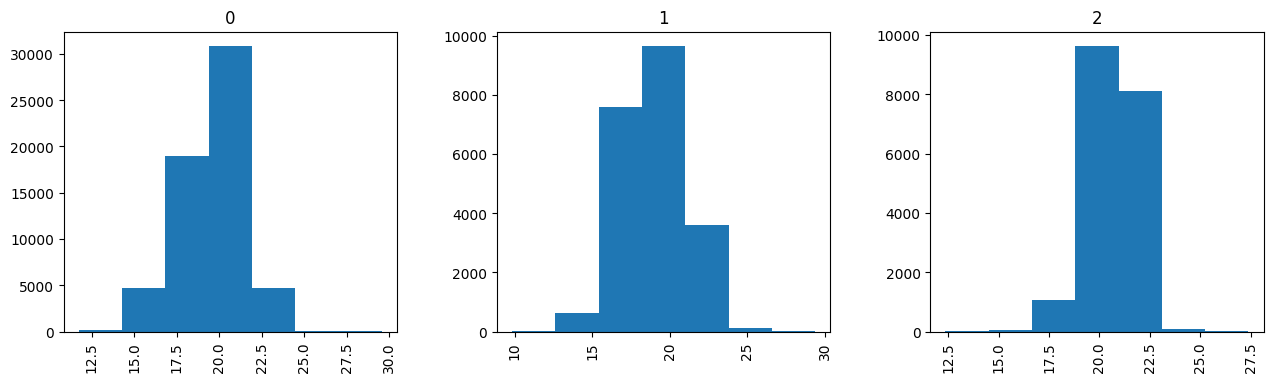

i


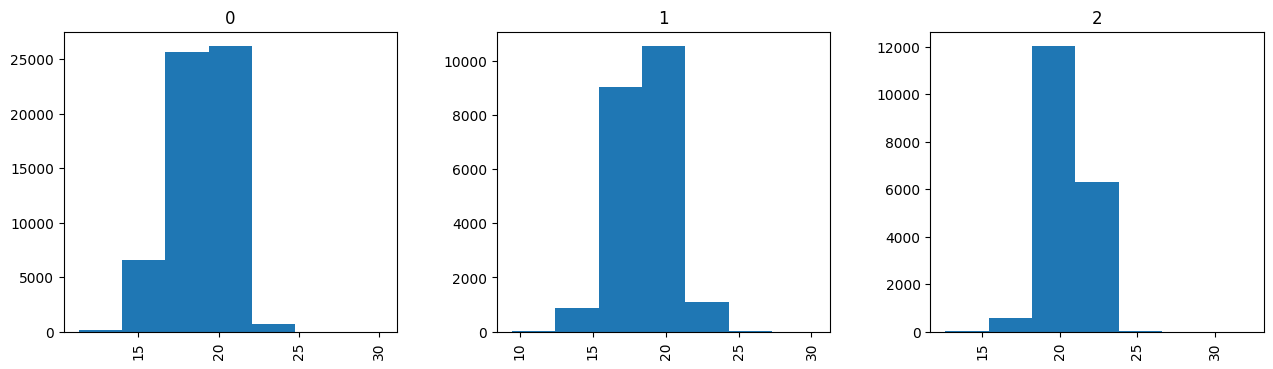

z


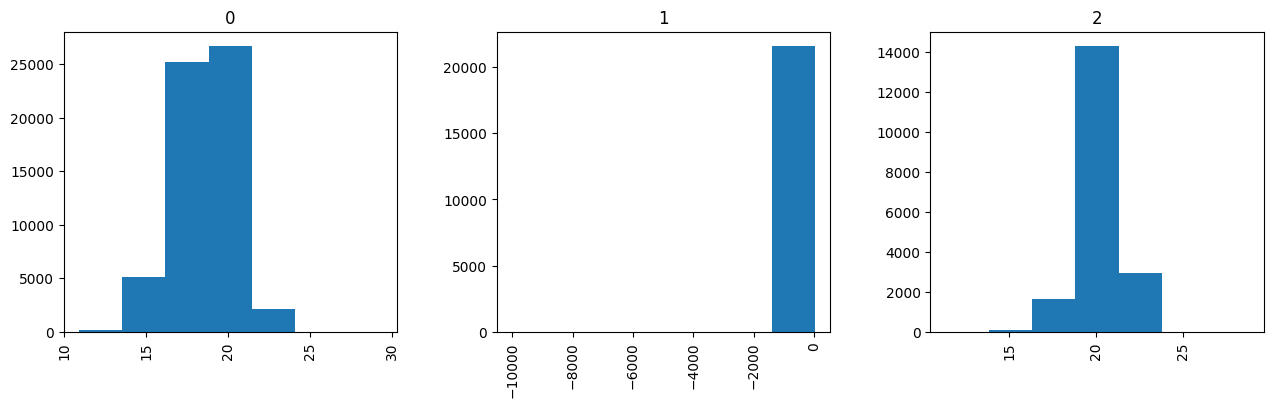

specobjid


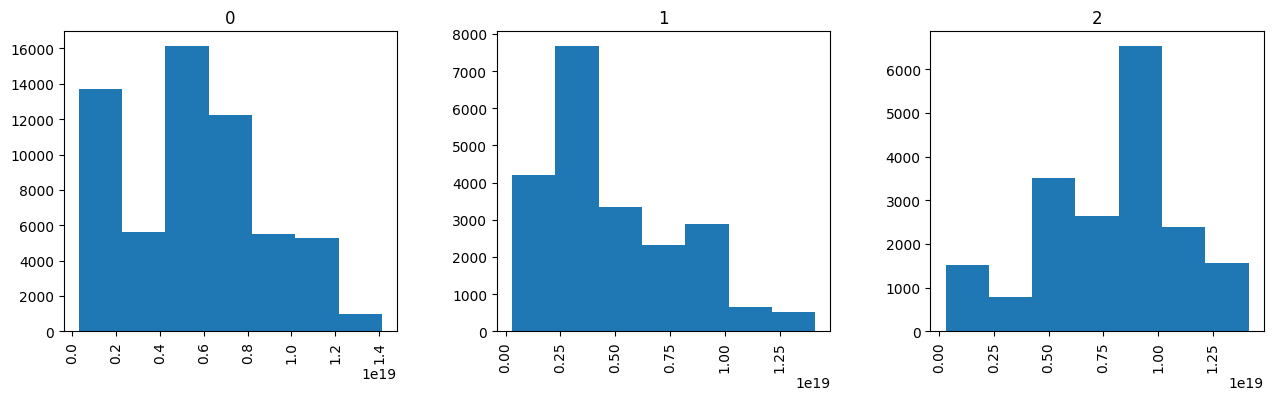

redshift


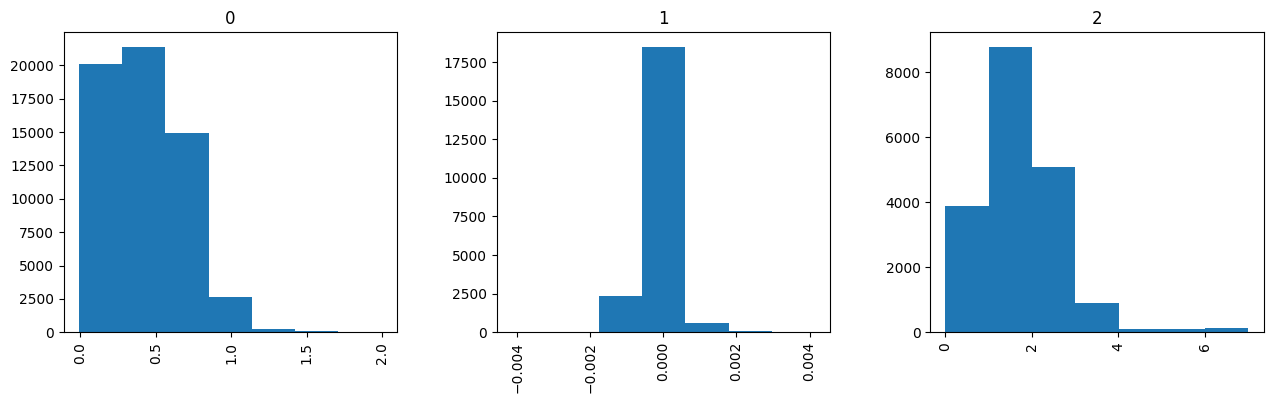

plate


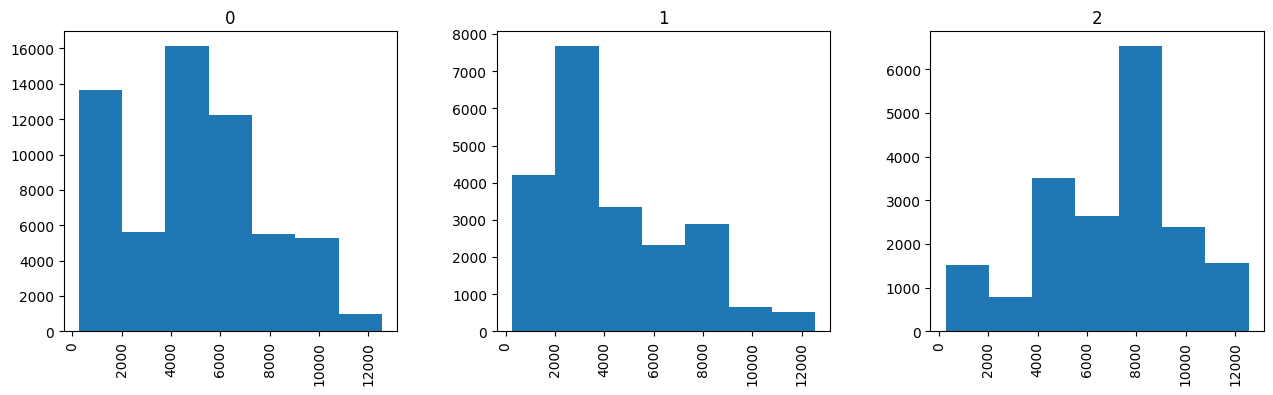

mjd


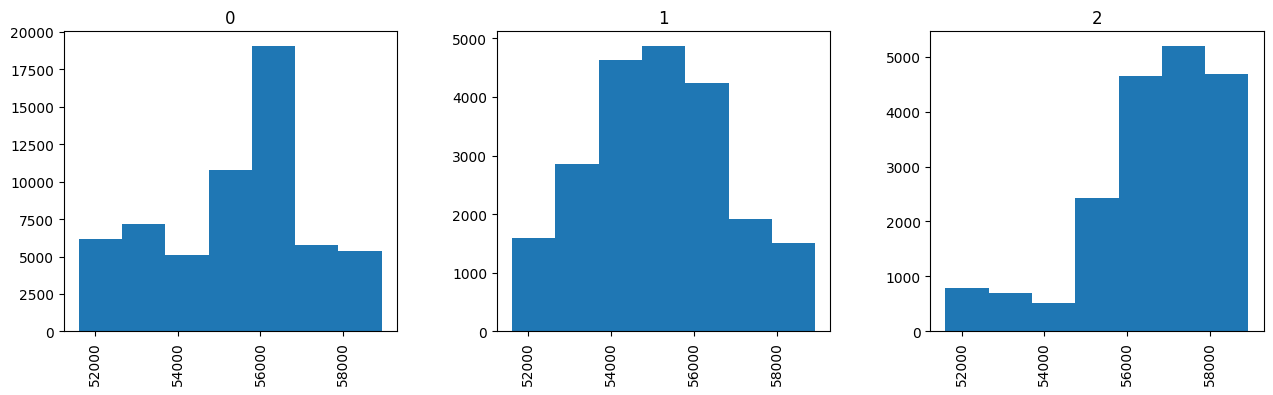

In [12]:
dfStars['last'] = 0
for att in dfStars.drop(['objid','ra','run','rerun','camcol','field','fiberid', 'class'], axis = 1).columns[:-1]:
    dfStars.hist(column=att, by='class', bins=7, figsize=(15,4), layout = (1,3)) # type: ignore
    print(att)
    plt.show()
dfStars.drop(['last'], axis=1, inplace=True)


Here I check the distribution of the Labeled-Class

In [4]:
dfStars['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

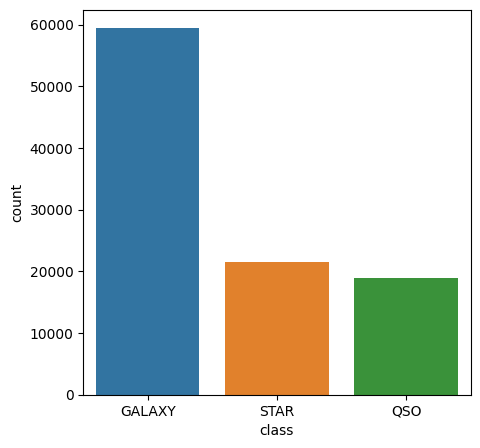

In [5]:
fig,axes = plt.subplots(1, 1, figsize=(5,5), sharey=True)
sns.countplot(x='class',data = dfStars, ax = axes, order = dfStars['class'].value_counts().index)
plt.show()

How we can see, this datasets is not wee ditributed. <br>
The class "Galaxy" have more than the double of the istances in compere to the other two classes. I will need to performe the rebalancing of the datasets, but not immediatly. First I'll performe the split in Traing and Test set, second the Outlier Detection, and then the Rebalancing.

<h1>Encoding of the classed-class</h1>

Encoding the classed-class with numerical data. 0 for "GALAXY", 1 for "STAR" and 2 for "QSO"


In [69]:
dfStars['class'] = dfStars['class'].replace({'GALAXY': 0, 'STAR': 1, 'QSO': 2})

<h1>Split the dataset in training set and test set.</h1>

In [70]:
X = dfStars.drop('class', axis=1)
y = dfStars['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print('Shape of the train and test set')
print(X_train.shape) # type: ignore
print(X_test.shape) # type: ignore
print()
print('Distribution of the labeled-classes')  
print()
print("Training Set")
print(pd.Series(y_train).value_counts())
print()
print("Test Set")
print(pd.Series(y_test).value_counts())

Shape of the train and test set
(70000, 17)
(30000, 17)

Distribution of the labeled-classes

Training Set
0    41636
1    15044
2    13320
Name: class, dtype: int64

Test Set
0    17809
1     6550
2     5641
Name: class, dtype: int64


<h1>Feature Selection</h1>

In the following cell I perform SelectKBest wit f_regression with k=10, for select the best feature

In [74]:
# Create an object SelectKBest with the value of k
selector = SelectKBest(score_func=f_regression, k=9)

# Fit
X_selected = selector.fit_transform(X_train, y_train)

dfKBest = pd.DataFrame(selector.scores_, columns=['Score'])
dfKBest.index = ['objid','ra','dec','u','g','r','i','z','run','rerun','camcol','field','specobjid','redshift','plate','mjd','fiberid'] # type: ignore
display(dfKBest.sort_values(by='Score', ascending=False))
print()
print("Features selected:")
print(X_train.columns[selector.get_support()]) # type: ignore

Score
redshift   28655.952271
z           9269.757834
i           6208.254359
u           3823.399010
plate       3402.130505
specobjid   3402.116179
mjd         3109.637519
r           1659.220666
g            305.125852
dec          218.452539
field        100.505200
fiberid       77.342021
camcol        14.037506
objid          0.418921
run            0.418374
ra             0.085929
rerun          0.000000


Features selected:
Index(['u', 'g', 'r', 'i', 'z', 'specobjid', 'redshift', 'plate', 'mjd'], dtype='object')


<h3>Delete Features</h3>
Drop all features rated lower than 10

In [7]:
X_train.drop(['objid', 'ra', 'run','rerun','camcol','field','fiberid', 'dec'], axis = 1, inplace=True) # type: ignore

<h1>Outlier Detection</h1>

Before apply the outlier detection, I plot all the feature in a boxplot, for understand what of features have outliers.

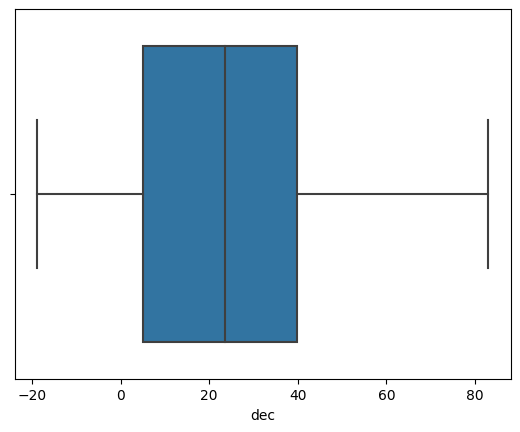

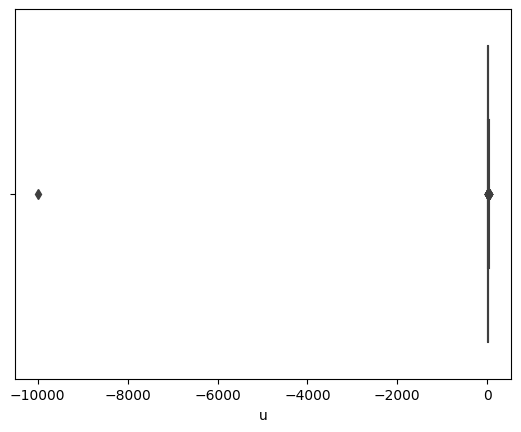

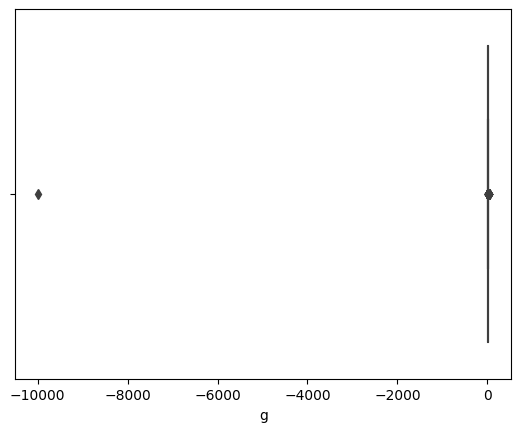

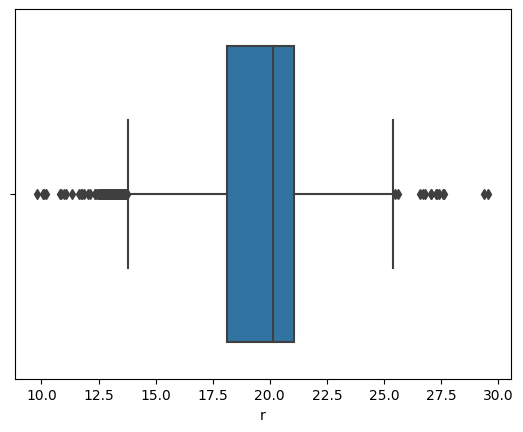

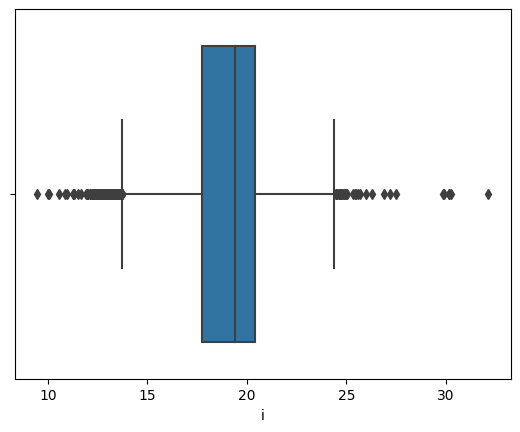

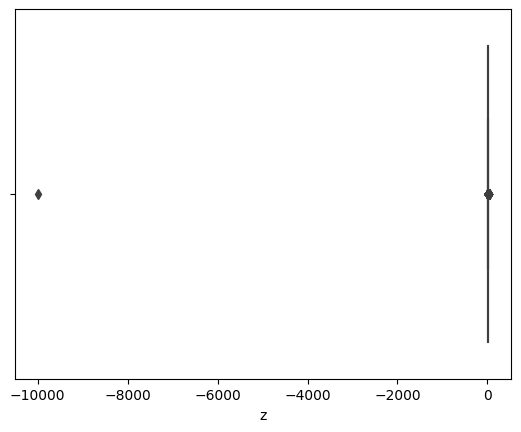

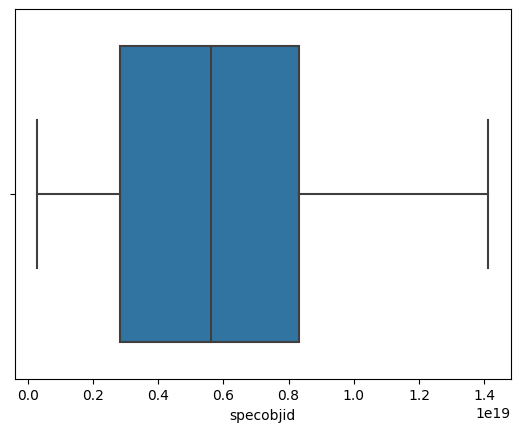

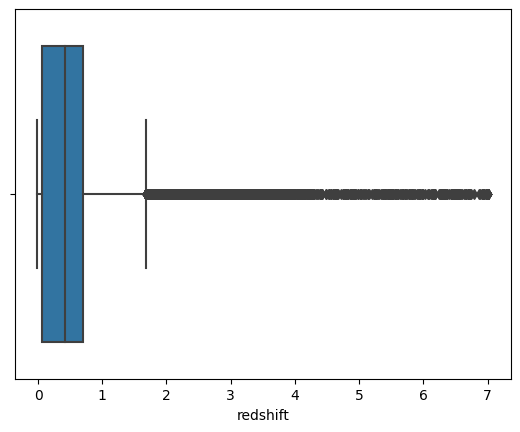

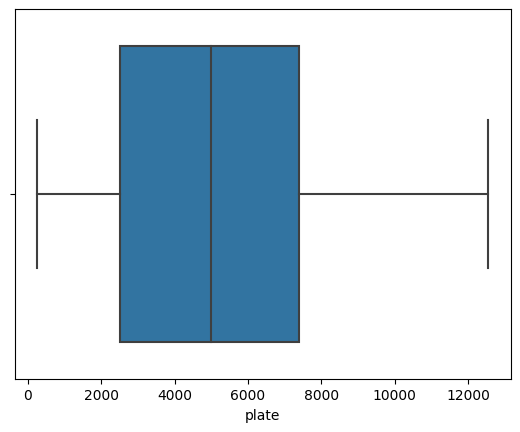

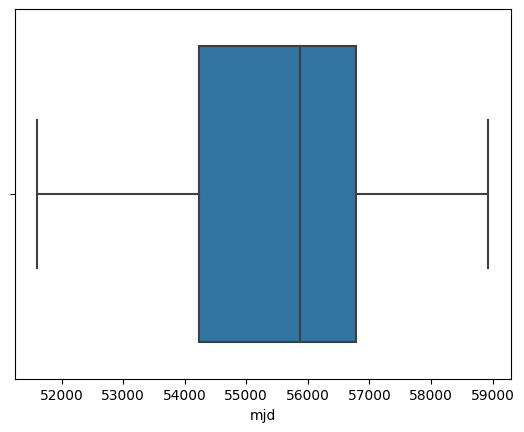

In [8]:
df_merged = pd.concat([X_train, y_train], axis=1) # type: ignore
for att in df_merged.columns[:-1]:
    sns.boxplot(x=dfStars[att])
    plt.show()

First I evaluate the best value of n_neighbors and contamination parameters, for perform the LOF algorithm, using the method GridSearchCV from sklearn.

In [76]:
df_merged = pd.concat([X_train, y_train], axis=1) # type: ignore

# Select the DataFrame and extract the features from the DataFrame
XX = df_merged[['u', 'g', 'r', 'i', 'z', 'specobjid', 'redshift']]

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import LocalOutlierFactor
import warnings
warnings.filterwarnings("ignore")

lof = LocalOutlierFactor()
params = {'n_neighbors': [1, 2, 3, 4, 5, 10, 15, 20], 'contamination': [0.1, 0.05, 0.01, 0.001]}
search = GridSearchCV(lof, params, scoring='accuracy')
search.fit(XX)

print("Best parameters: ", search.best_params_)

Best parameters:  {'contamination': 0.1, 'n_neighbors': 1}


Now I can perform the LOF algorithm with {'contamination': 0.1, 'n_neighbors': 1}

In [92]:
# Creates the LocalOutlierFactor object with n_neighbors and contamination parameters
lof = LocalOutlierFactor(n_neighbors=1, contamination=0.1) # type: ignore

outliers = lof.fit_predict(XX)
df_after_outlier = df_merged[outliers == 1]
print("From: " + str(df_merged.shape))
print("To:   " + str(df_after_outlier.shape))

From: (70000, 18)
To:   (63002, 18)


In [33]:
X_train = df_after_outlier.drop('class', axis=1)
y_train = df_after_outlier['class']

Now I see the heatmap of the features where I performed the LOF Algorithm, just for make a comparison between the dataset without Outlier Detection. We can see that now the correlation between "u", "g" and "z" it's lower than before (that was 1)

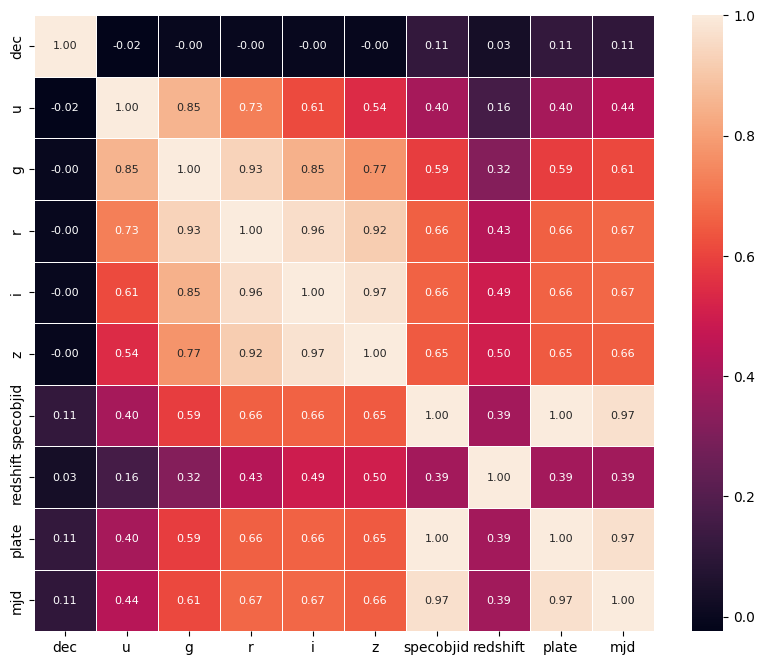

In [29]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df_merged.drop(['class'], axis = 1).corr(), annot=True, linewidths=.5, fmt='.2f', ax=ax, annot_kws={'fontsize': 8})
plt.show()

The following boxplots are useful for see the differences from the others before the outlier detection analysys.

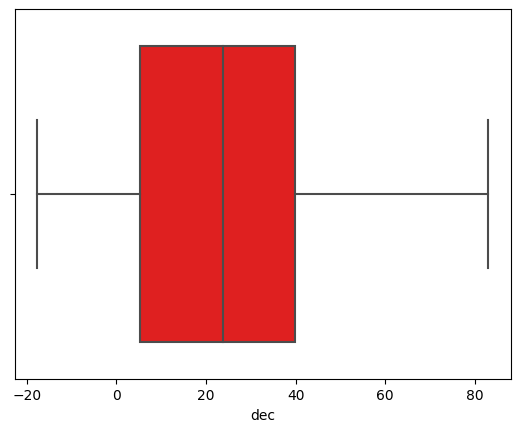

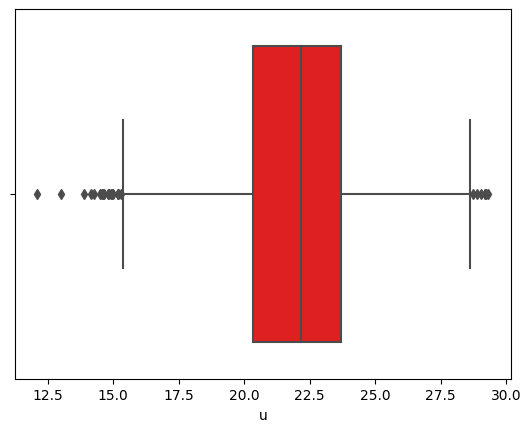

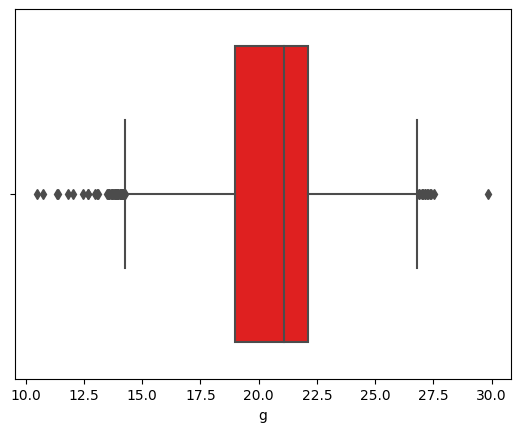

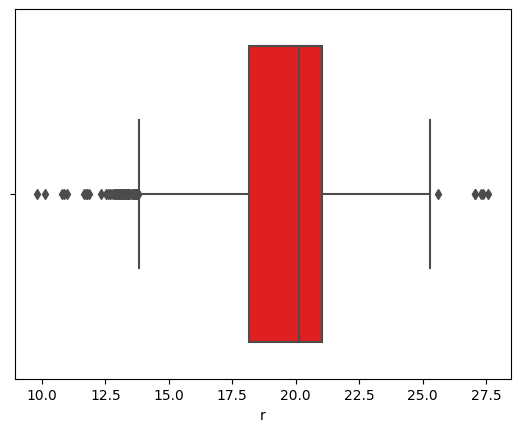

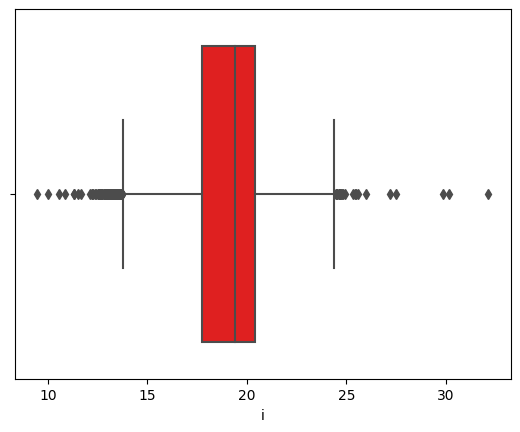

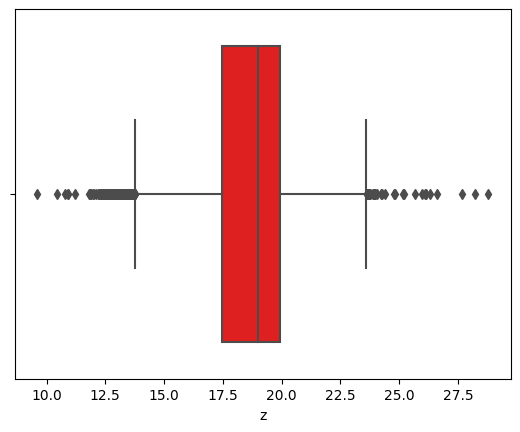

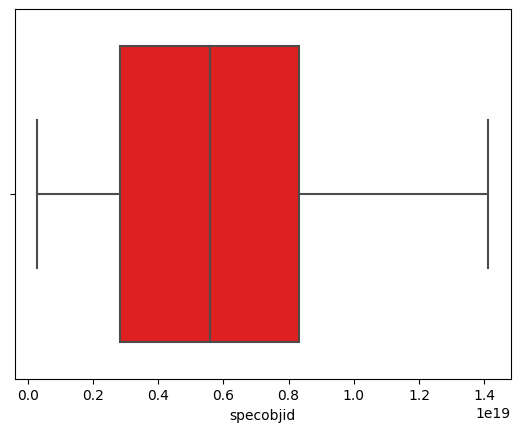

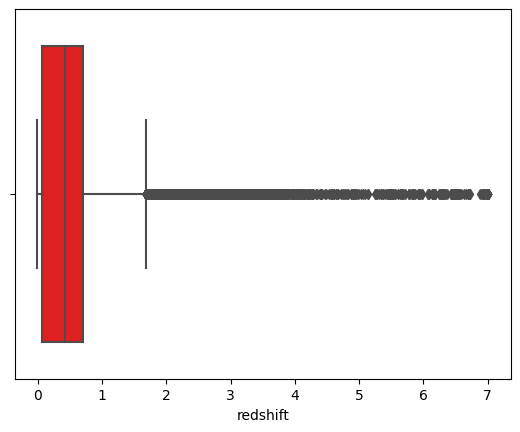

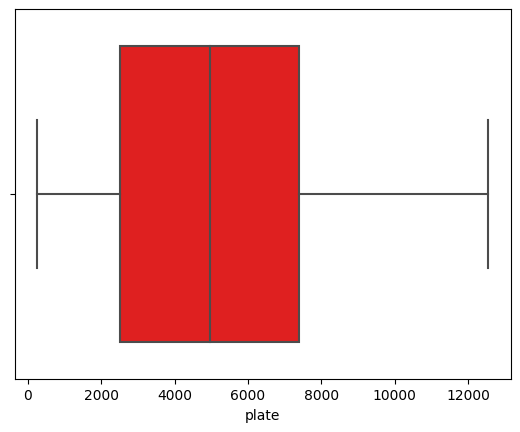

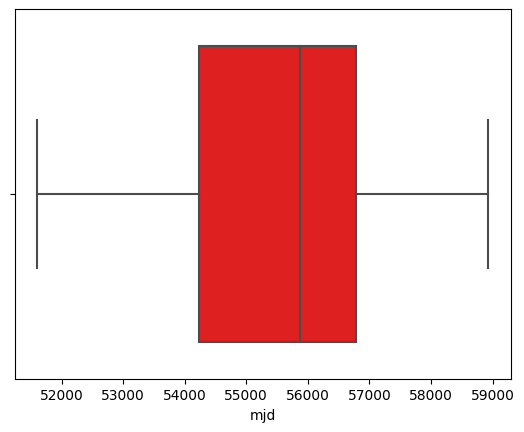

In [25]:
for att in df_after_outlier.columns[:-1]:  # type: ignore
    sns.boxplot(x=df_after_outlier[att], color='r')
    plt.show()

<h1>Rebalance Dataset</h1>
I add features into the two minority classes (STAR, QSO) until they reach the class with the higer number of examble (GALAXY). <br>
In the following snip of code I implement an over sampling without replacement, using SMOTE. <br><br>
The histograms are useful for see that the distribution after the balance doesn't change the trend.

dec


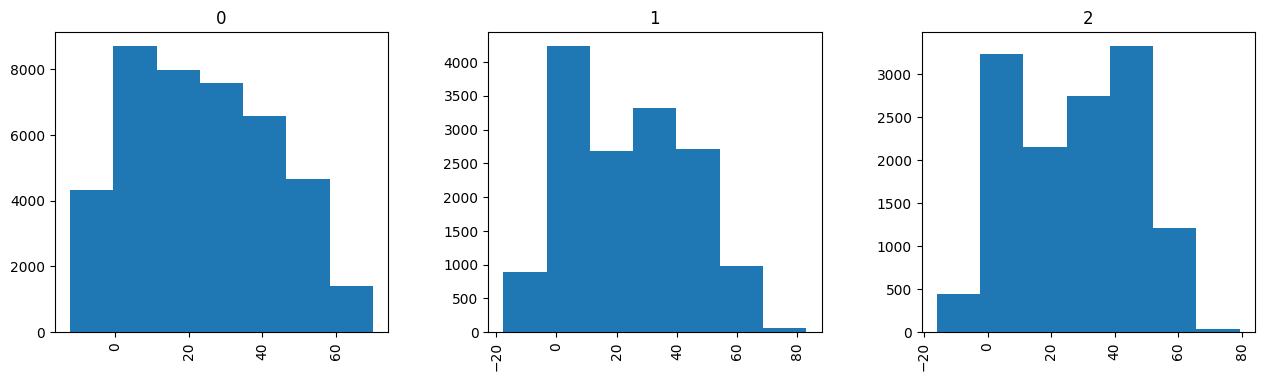

u


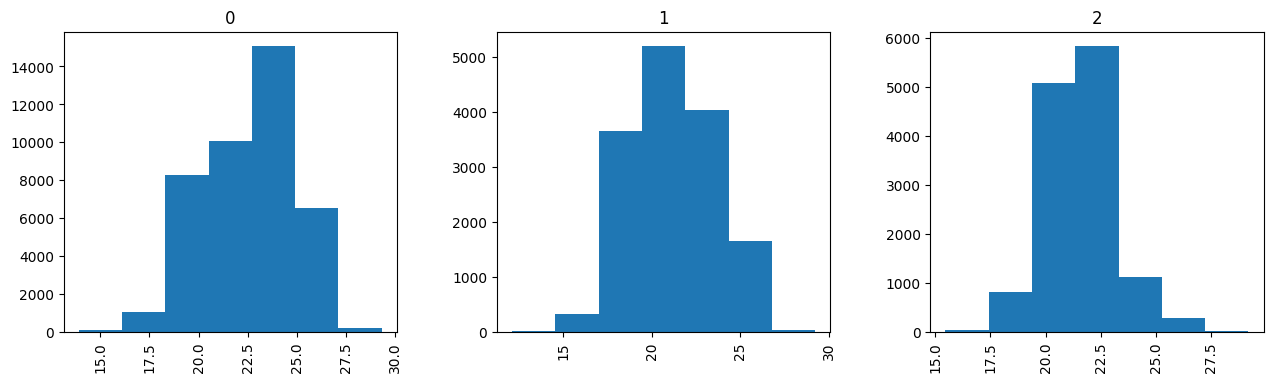

g


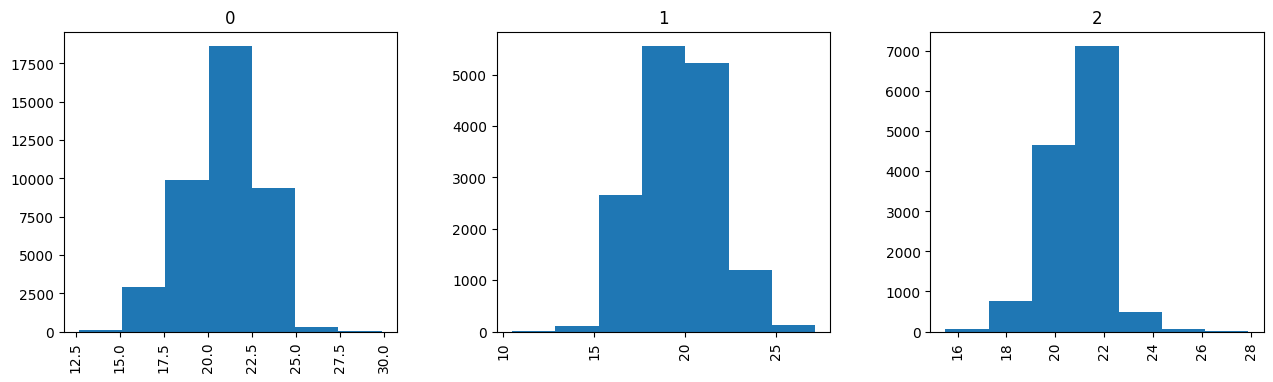

r


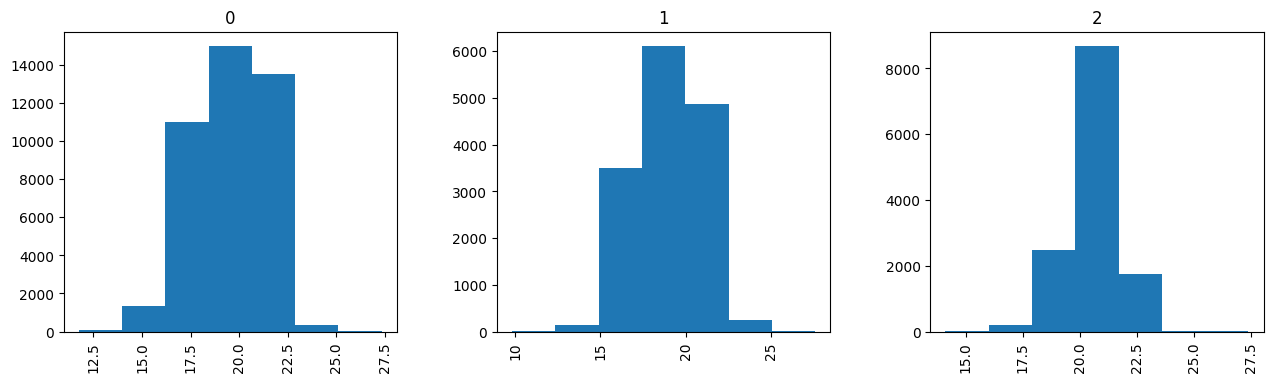

i


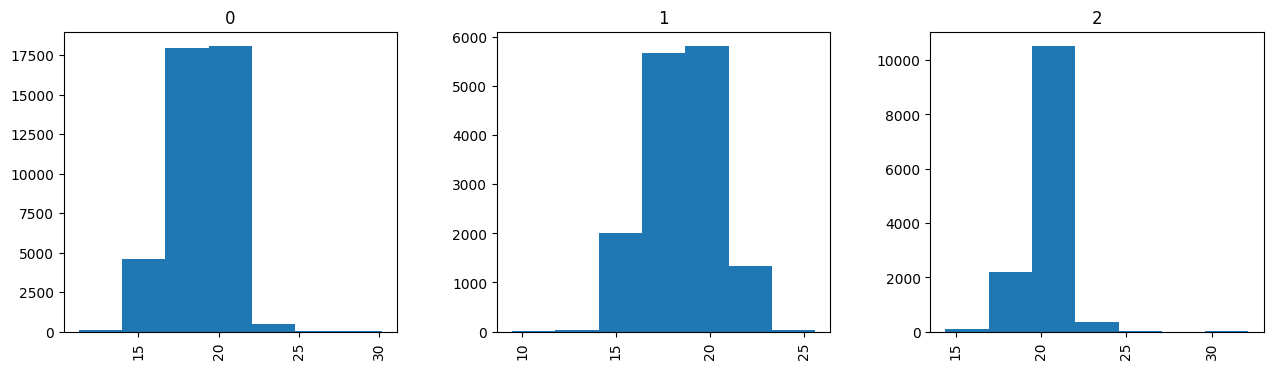

z


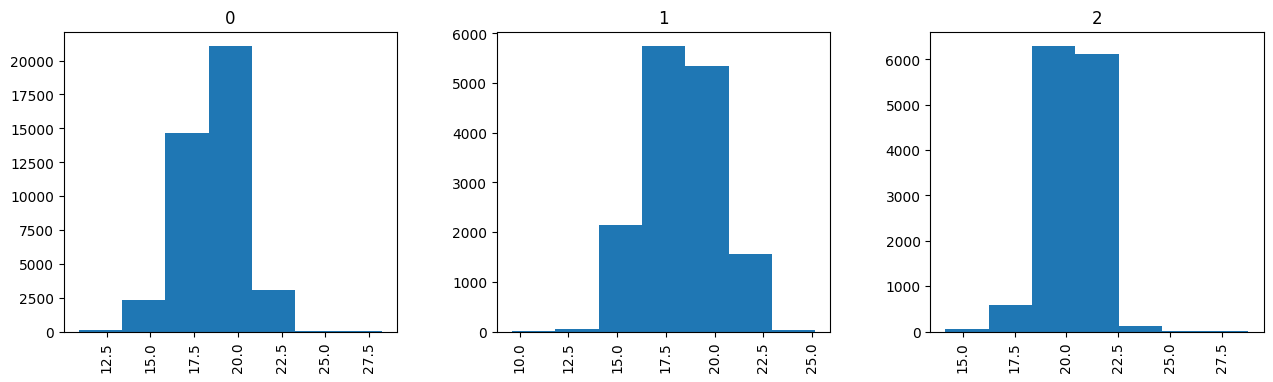

specobjid


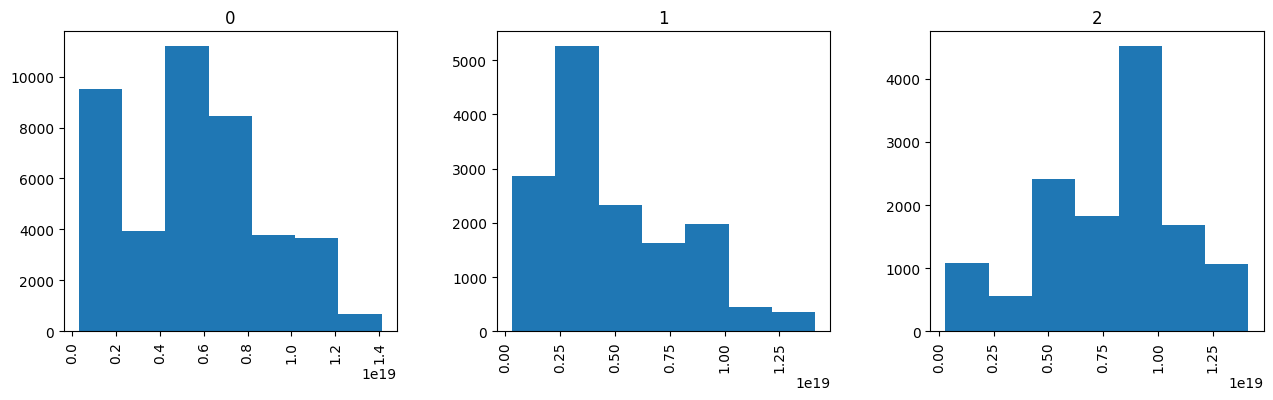

redshift


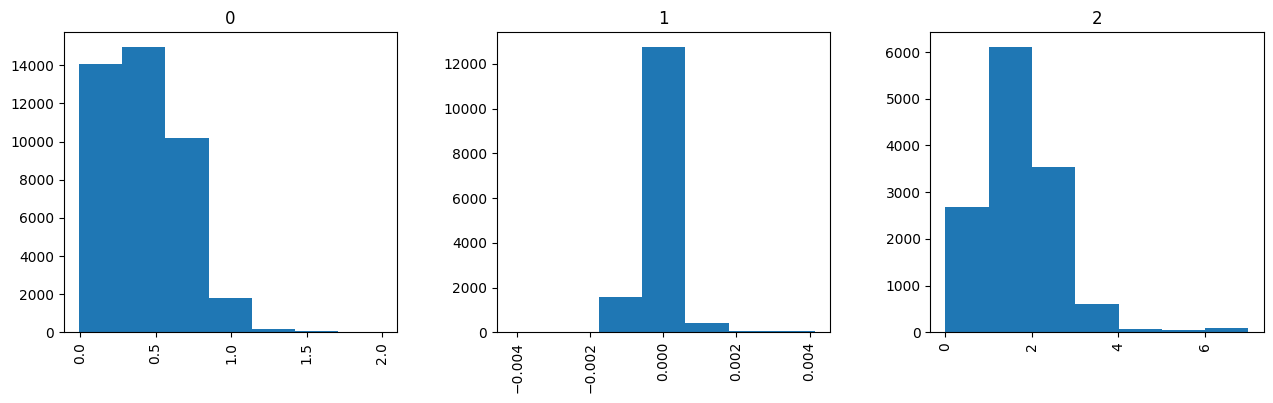

plate


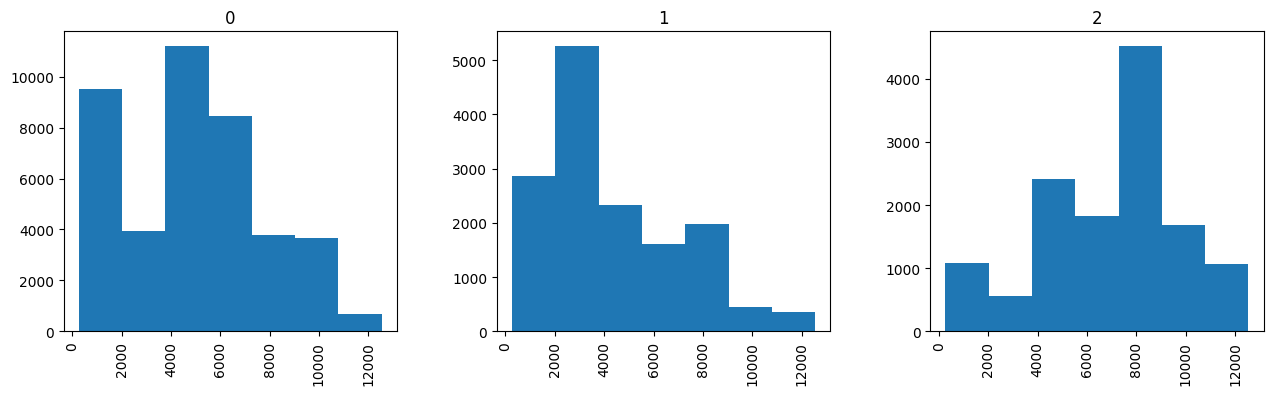

mjd


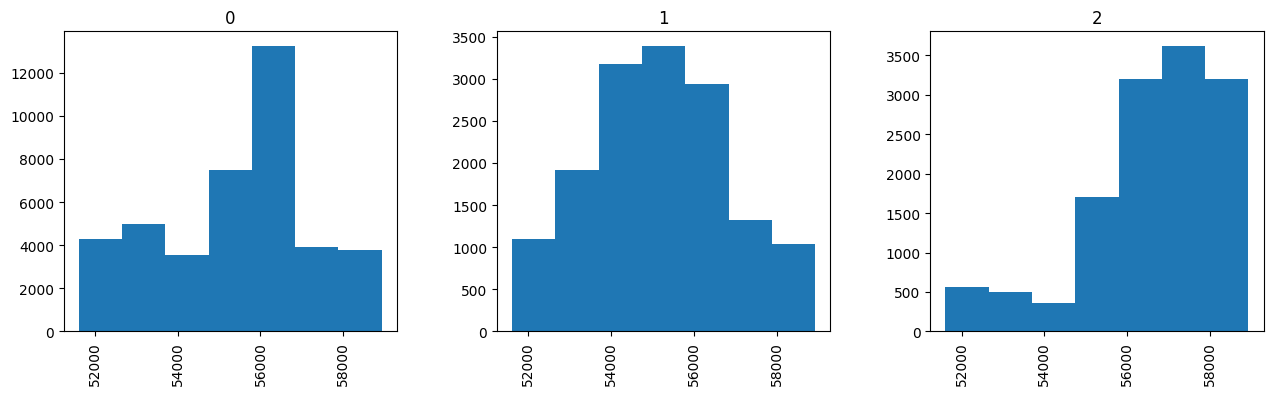

In [10]:
df_merged = pd.concat([X_train, y_train], axis=1)
for att in df_merged.columns[:-1]:  # type: ignore
    df_merged.hist(column=att, by='class', bins = 7, figsize=(15,4),layout = (1,3)) # type: ignore
    print(att)
    plt.show()

In [34]:
# using oversampling with SMOTE to deal with imbalanced data
sm = SMOTE(random_state=42)
X_train_after_balancing, y_train_after_balancing = sm.fit_resample(X_train, y_train) # type: ignore

print(X_train_after_balancing.shape) # type: ignore
y_train_after_balancing.value_counts() # type: ignore

(101349, 10)


0    33783
2    33783
1    33783
Name: class, dtype: int64

Now I analyse the distribution of each attribute, after the rebalancing of the datasets

dec


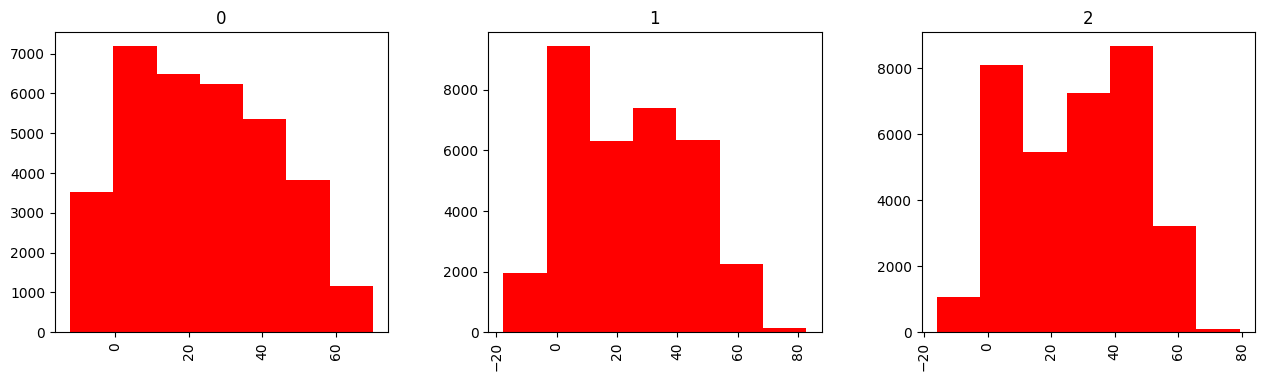

u


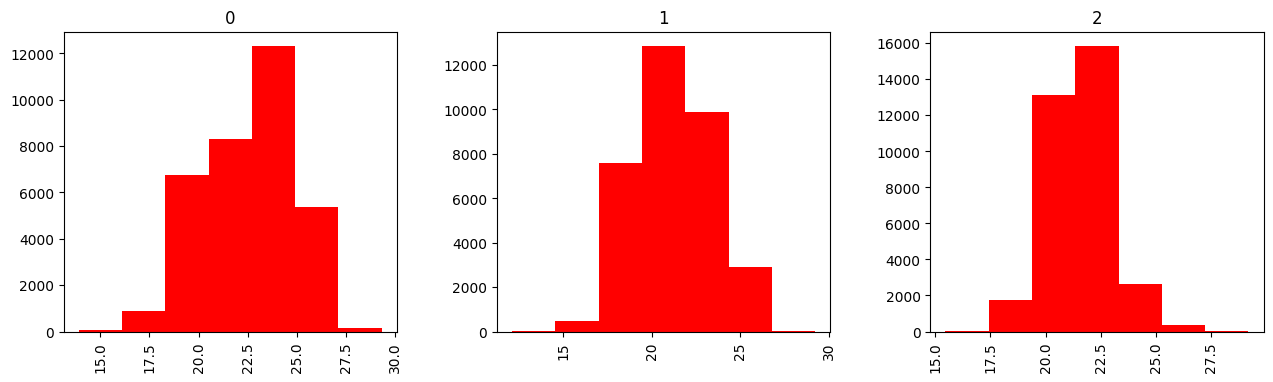

g


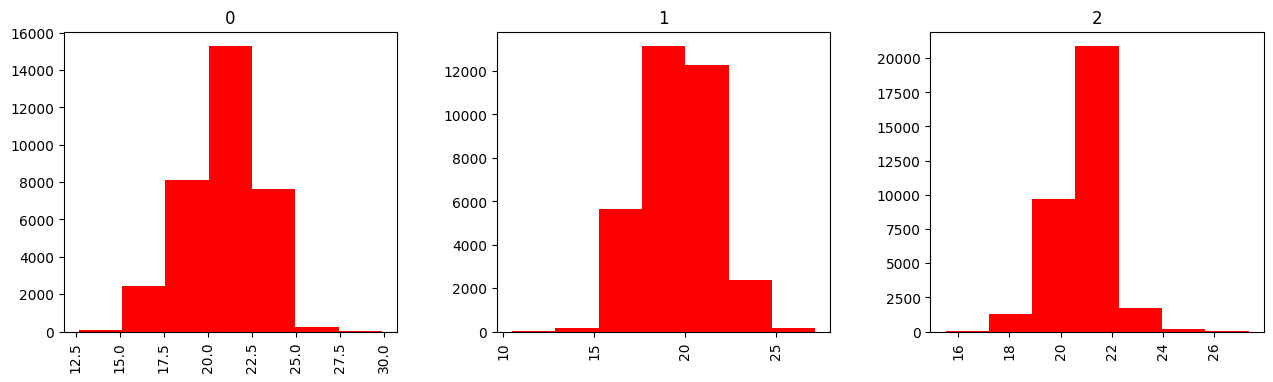

r


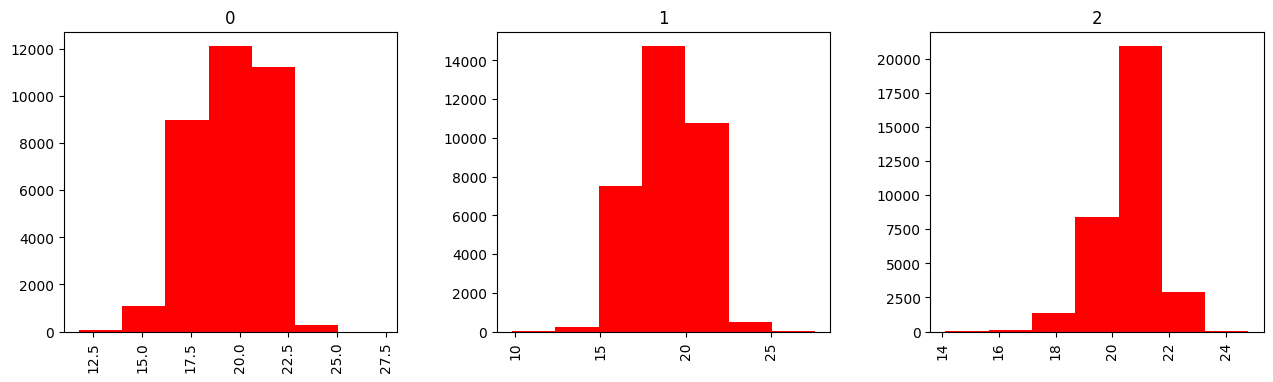

i


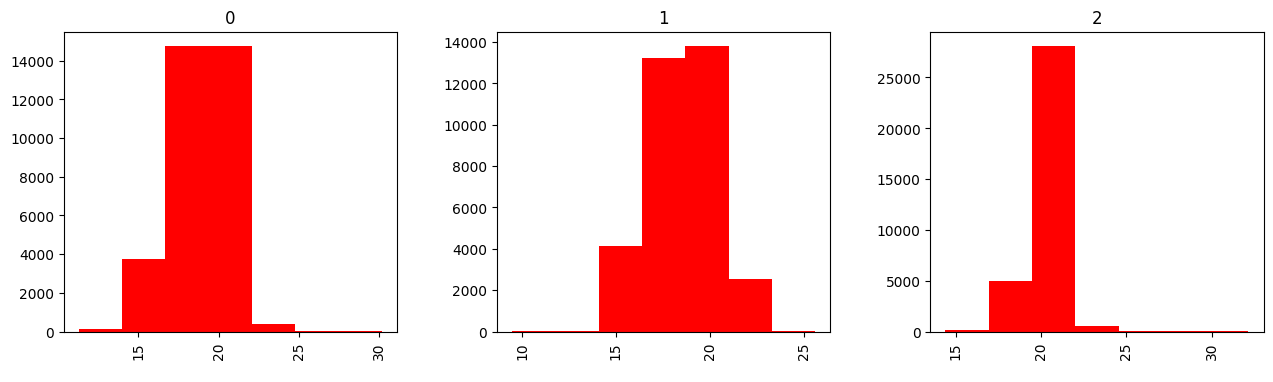

z


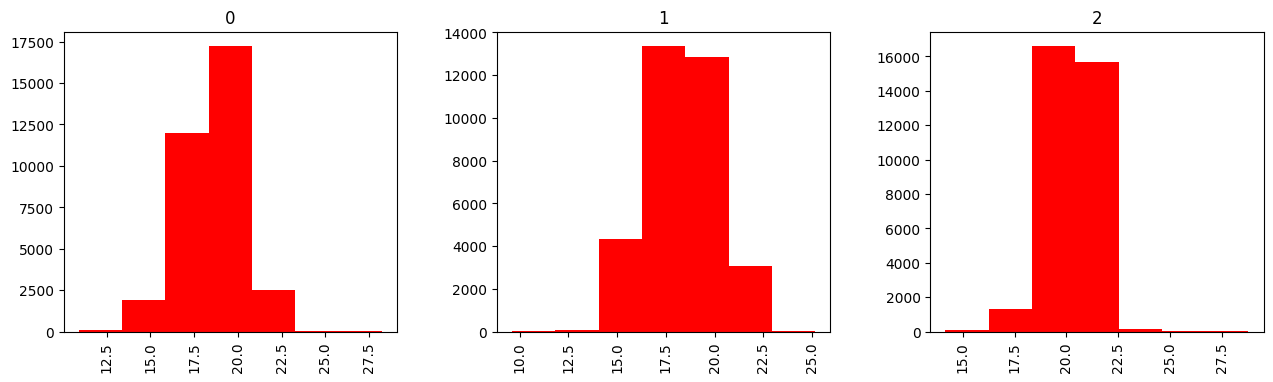

specobjid


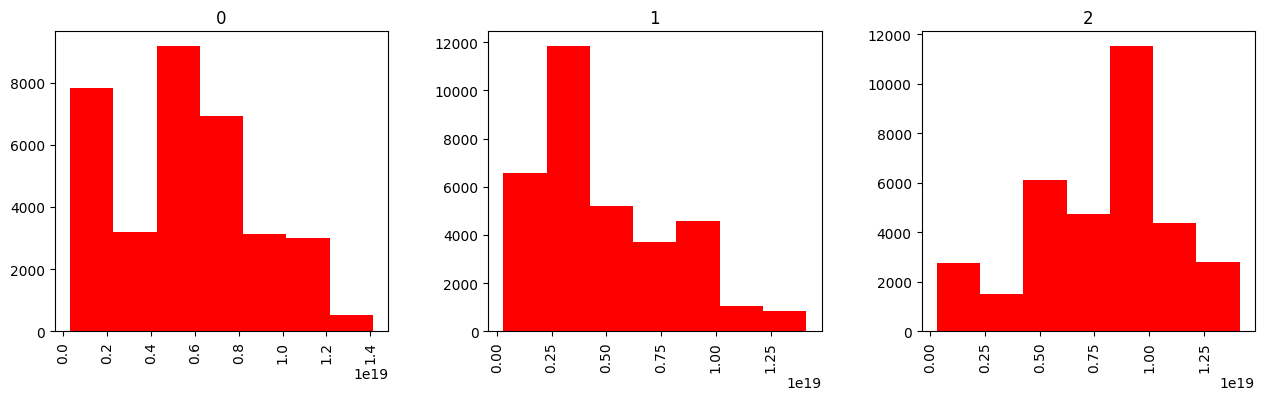

redshift


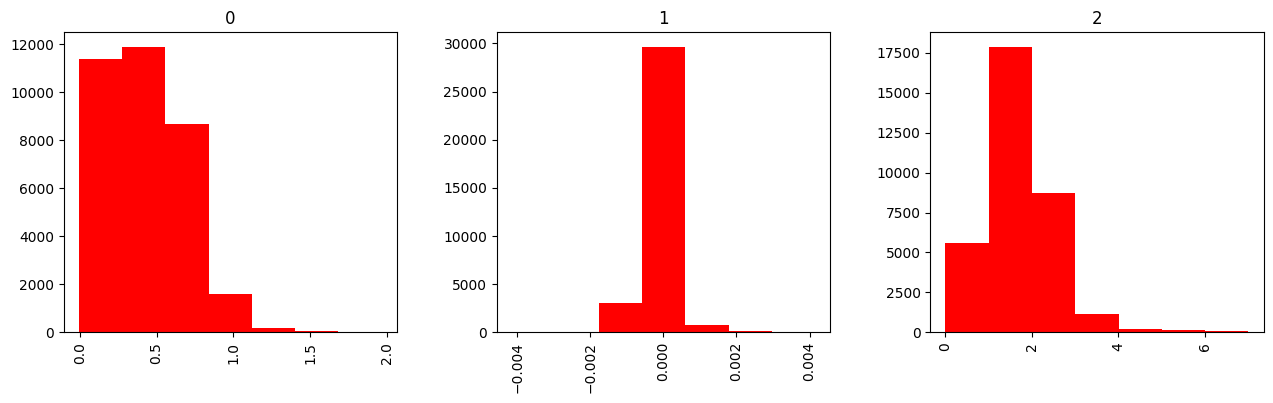

plate


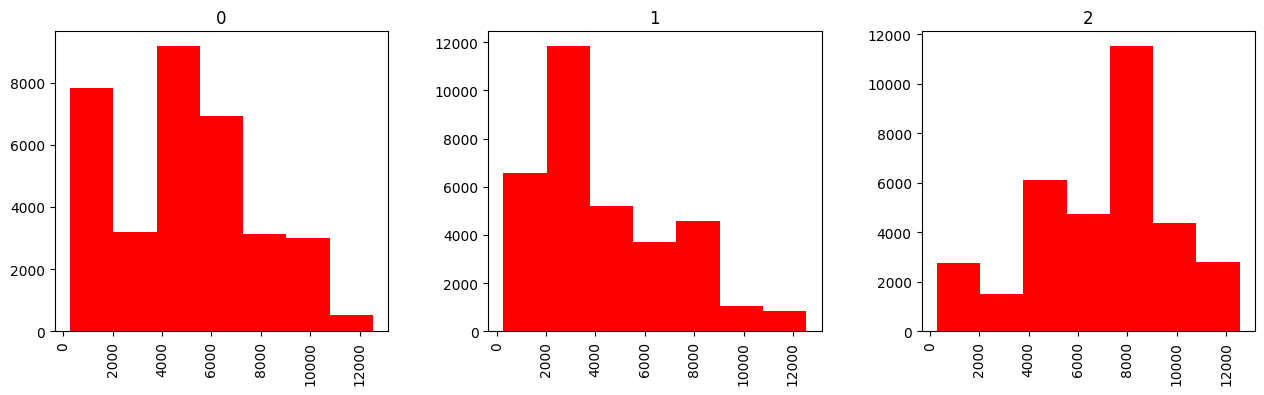

mjd


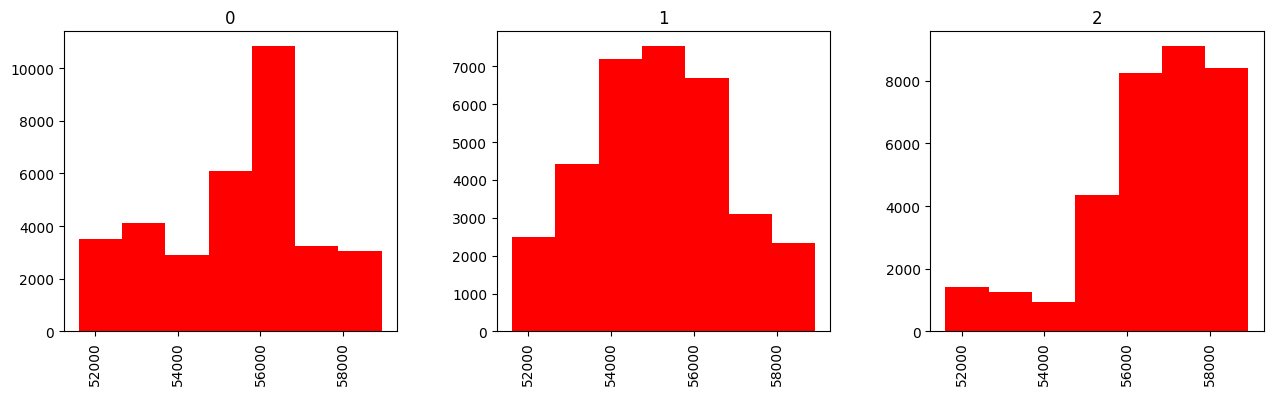

In [35]:
df_merged = pd.concat([X_train_after_balancing, y_train_after_balancing], axis=1)
for att in df_merged.columns[:-1]:  # type: ignore
    df_merged.hist(column=att, by='class', bins = 7, figsize=(15,4),layout = (1,3), color='r') # type: ignore
    print(att)
    plt.show()

<h1 style="font-weight: bold">CLASSIFICATION</h1>

In [93]:
X_train_class = X_train_after_balancing
y_train_class = y_train_after_balancing
X_test_drop = X_test.drop(['objid', 'ra', 'run', 'rerun', 'camcol', 'field', 'fiberid'], axis = 1) # type: ignore
X_train_class.shape, y_train_class.shape

((101349, 10), (101349,))

<h2>KNeighborsClassifier</h2>
I tried to perform KNN with 100 differents k, for understand which is the best. <br>
I decided to use the euclidean and the manhattan distance, for make a comparison

In [50]:
k_neighbors = 100
metrics = ['euclidean', 'manhattan']

accuracy_total = []
for k in range(1, k_neighbors+1, 1):
    accuracy_k = []
    for metric in metrics:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train_class, y_train_class)
        y_predKNN = knn.predict(X_test_drop)
        accuracy = accuracy_score(y_test, y_predKNN)
        accuracy_k.append(accuracy)
        # print(f"For metric = {metric} and k = {k}:      ACCURACY = {accuracy}")
    accuracy_total.append(accuracy_k)

accuracy_df = pd.DataFrame(np.array(accuracy_total), columns=metrics)
k_df = pd.DataFrame([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100], columns=['k'])
accuracy_join= k_df.join(accuracy_df)

The following snip of code shows us the trend of the KNN's accuracy for the euclidean and manhattan distance.<br> 
The graph for each distance it's almost the same. But the accurasy reach just the 67% in the peak, for k = 3.

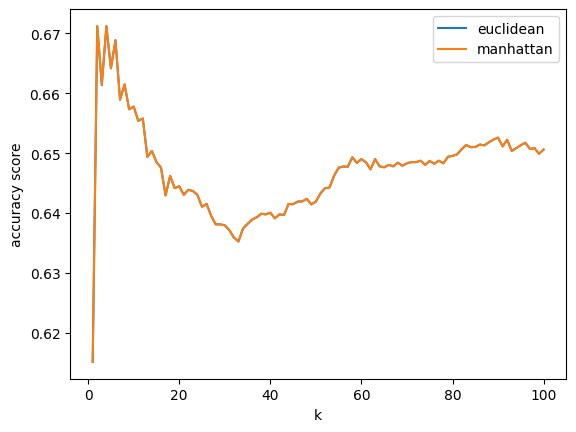

In [51]:
plt.plot(accuracy_join['k'], accuracy_join['euclidean'], label='euclidean')
plt.plot(accuracy_join['k'], accuracy_join['manhattan'], label='manhattan')

plt.legend()
plt.xlabel('k')
plt.ylabel('accuracy score')
plt.show()

In [100]:
accuracy_df.T

0         1         2         3         4         5         6   \
euclidean  0.6151  0.671200  0.661367  0.671200  0.664167  0.668900  0.658900   
manhattan  0.6151  0.671267  0.661500  0.671267  0.664200  0.668833  0.658967   

                 7         8         9   ...        90        91        92  \
euclidean  0.661467  0.657333  0.657800  ...  0.651133  0.652233  0.650367   
manhattan  0.661533  0.657333  0.657767  ...  0.651133  0.652233  0.650367   

                 93        94        95      96        97      98      99  
euclidean  0.650833  0.651333  0.651733  0.6507  0.650833  0.6499  0.6506  
manhattan  0.650833  0.651333  0.651733  0.6507  0.650833  0.6499  0.6506  

[2 rows x 100 columns]

In [52]:
accuracy_ed = []
accuracy_md = []

for i in range(k_neighbors):
    accuracy_ed.append(accuracy_total[i][0])
    accuracy_md.append(accuracy_total[i][1])

max_index = max(enumerate(accuracy_ed), key=lambda x: x[1])[0]
print(f"Euclidean Distance: The value of k with the higher accuracy is {max_index}. Accuracy = {accuracy_ed[max_index]}")

max_index = max(enumerate(accuracy_md), key=lambda x: x[1])[0]
print(f"Manhattan Distance: The value of k with the higher accuracy is: {max_index}. Accuracy = {accuracy_md[max_index]}")

accuracyKNN = accuracy_md[max_index]

Euclidean Distance: The value of k with the higher accuracy is 1. Accuracy = 0.6712
Manhattan Distance: The value of k with the higher accuracy is: 1. Accuracy = 0.6712666666666667


Cross-Validation

In [101]:
knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn.fit(X_train_class, y_train_class)
y_predKNN = knn.predict(X_test_drop)

# Use cross-validation to evaluate model accuracy
skf = StratifiedKFold(10, shuffle = True, random_state = 21)
scores = cross_val_score(knn, X, y, cv=skf)

print(f"Cross-validation scores: {scores}")
print(f"Mean score: { scores.mean()}")

Cross-validation scores: [0.7019 0.694  0.6857 0.693  0.6958 0.6948 0.6973 0.6922 0.6917 0.6965]
Mean score: 0.69429


Confusion Matrix


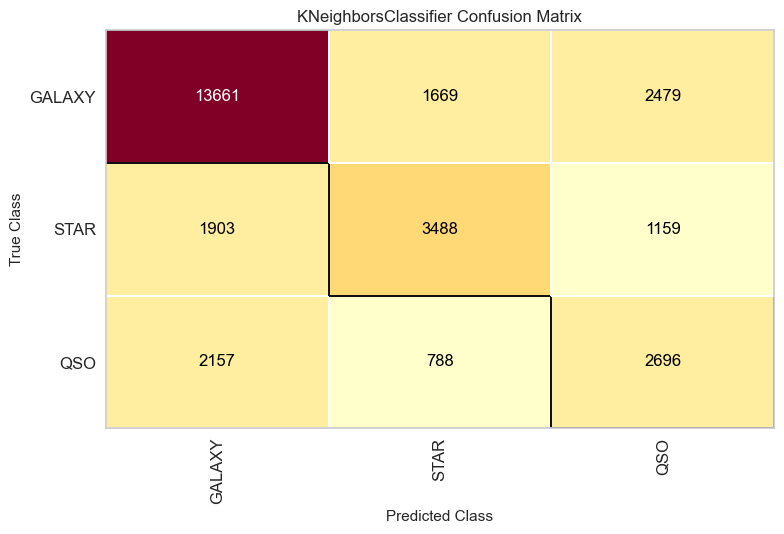


              precision    recall  f1-score   support

           0       0.77      0.77      0.77     17809
           1       0.59      0.53      0.56      6550
           2       0.43      0.48      0.45      5641

    accuracy                           0.66     30000
   macro avg       0.59      0.59      0.59     30000
weighted avg       0.67      0.66      0.66     30000



In [102]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predKNN)

from yellowbrick.classifier import ConfusionMatrix
rf_cm = ConfusionMatrix(knn, classes=['GALAXY','STAR','QSO'])

rf_cm.fit(X_train_class, y_train_class)
rf_cm.score(X_test_drop, y_test)
rf_cm.show()

print()
print(classification_report(y_test, y_predKNN))

In [103]:
# Estraiamo gli elementi della confusion matrix che ci serviranno per calcolare le metriche
tp0, tp1, tp2 = confusion_matrix[0, 0], confusion_matrix[1, 1], confusion_matrix[2, 2]
fn0, fn1, fn2 = confusion_matrix[0, 1] + confusion_matrix[0, 2], confusion_matrix[1, 0] + confusion_matrix[1, 2], confusion_matrix[2, 0] + confusion_matrix[2, 1]
fp0, fp1, fp2 = confusion_matrix[1, 0] + confusion_matrix[2, 0], confusion_matrix[0, 1] + confusion_matrix[2, 1], confusion_matrix[0, 2] + confusion_matrix[1, 2]
tn0 = confusion_matrix[1, 1] + confusion_matrix[1, 2] + confusion_matrix[2, 1] + confusion_matrix[2, 2]
tn1 = confusion_matrix[0, 0] + confusion_matrix[0, 2] + confusion_matrix[2, 0] + confusion_matrix[2, 2]
tn2 = confusion_matrix[0, 0] + confusion_matrix[0, 1] + confusion_matrix[1, 0] + confusion_matrix[1, 1]

# Calcoliamo le metriche
accuracy0 = (tp0 + tn0)/confusion_matrix.sum()
accuracy1 = (tp1 + tn1)/confusion_matrix.sum()
accuracy2 = (tp2 + tn2)/confusion_matrix.sum()
sensitivity0 = tp0 / (tp0 + fn0)
sensitivity1 = tp1 / (tp1 + fn1)
sensitivity2 = tp2 / (tp2 + fn2)
specificity0 = tn0 / (tn0 + fp0)
specificity1 = tn1 / (tn1 + fp1)
specificity2 = tn2 / (tn2 + fp2)

print(f"Accuracy (GALAXY): {accuracy0:.2f}")
print(f"Accuracy (STAR): {accuracy1:.2f}")
print(f"Accuracy (QUASAR): {accuracy2:.2f}")
print()
print(f"Sensitivity (GALAXY): {sensitivity0:.2f}")
print(f"Sensitivity (STAR): {sensitivity1:.2f}")
print(f"Sensitivity (QUASAR): {sensitivity2:.2f}")
print()
print(f"Specificity (GALAXY): {specificity0:.2f}")
print(f"Specificity (STAR): {specificity1:.2f}")
print(f"Specificity (QUASAR): {specificity2:.2f}")

Accuracy (GALAXY): 0.73
Accuracy (STAR): 0.82
Accuracy (QUASAR): 0.78

Sensitivity (GALAXY): 0.77
Sensitivity (STAR): 0.53
Sensitivity (QUASAR): 0.48

Specificity (GALAXY): 0.67
Specificity (STAR): 0.90
Specificity (QUASAR): 0.85


ROC Curve

[0.7687074282542168, 0.7532789986816192, 0.708829964916666]


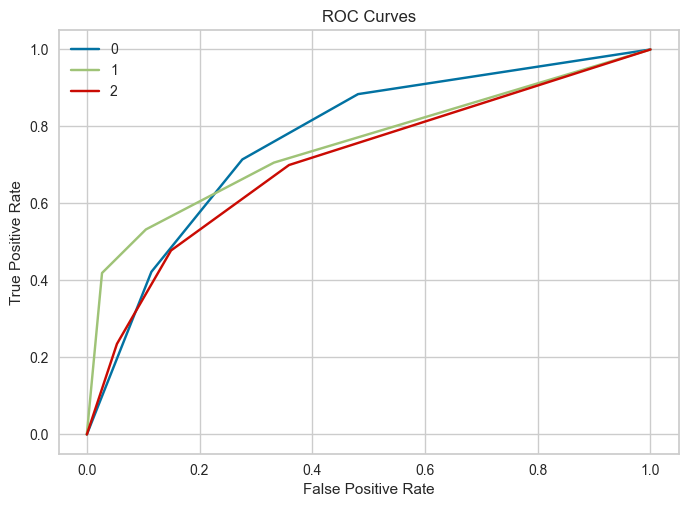

In [104]:
from sklearn.metrics import roc_auc_score, roc_curve

# calcola il punteggio ROC AUC per ogni classe
roc_auc_scores = []
for cl in range(3):
  y_true = y_test == cl # crea un array di valori booleani in cui True rappresenta l'appartenenza alla classe cl
  y_score = knn.predict_proba(X_test_drop)[:, cl] # calcola le probabilità di appartenenza alla classe cl
  score = roc_auc_score(y_true, y_score) # calcola il punteggio ROC AUC
  roc_auc_scores.append(score)

print(roc_auc_scores)


# traccia le curve ROC per ogni classe
for cl, score in zip(range(3), roc_auc_scores):
  y_true = y_test == cl # crea un array di valori booleani in cui True rappresenta l'appartenenza alla classe cl
  y_score = knn.predict_proba(X_test_drop)[:, cl] # calcola le probabilità di appartenenza alla classe cl
  fpr, tpr, thresholds = roc_curve(y_true, y_score) # calcola la FPR, la TPR e i thresholds
  plt.plot(fpr, tpr, label=cl)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

<h2>Decision Tree</h2>

In [105]:
# Create the model
dtc = DecisionTreeClassifier()

# Fit the model
dtc = dtc.fit(X_train_class, y_train_class)
y_predDT = dtc.predict(X_test_drop)

# Check the accuracy
accuracyDT = accuracy_score(y_test, y_predDT)
print(f"Accuracy: {accuracyDT:.2f}")

Accuracy: 0.96


Cross-Validation

In [106]:
# Use cross-validation to evaluate model accuracy
skf = StratifiedKFold(10, shuffle = True, random_state = 21)
scores = cross_val_score(dtc, X, y, cv=skf)

print(f"Cross-validation scores: {scores}")
print(f"Mean score: { scores.mean()}")

Cross-validation scores: [0.9664 0.964  0.9631 0.9669 0.9664 0.9642 0.9646 0.9666 0.9653 0.9622]
Mean score: 0.9649699999999999


Confusion Matrix


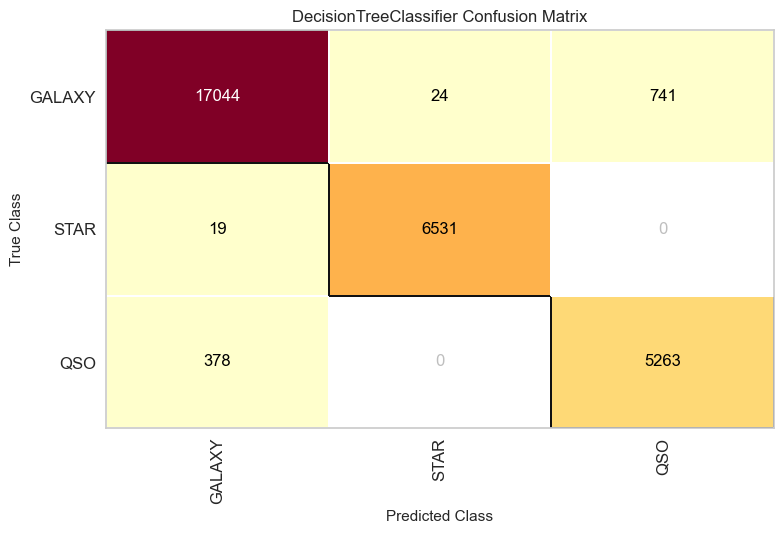


              precision    recall  f1-score   support

           0       0.98      0.96      0.97     17809
           1       1.00      1.00      1.00      6550
           2       0.88      0.93      0.90      5641

    accuracy                           0.96     30000
   macro avg       0.95      0.96      0.96     30000
weighted avg       0.96      0.96      0.96     30000



In [107]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predDT)

from yellowbrick.classifier import ConfusionMatrix
rf_cm = ConfusionMatrix(dtc, classes=['GALAXY','STAR','QSO'])

rf_cm.fit(X_train_class, y_train_class)
rf_cm.score(X_test_drop, y_test)
rf_cm.show()

print()
print(classification_report(y_test, y_predDT))

In [108]:
# Estraiamo gli elementi della confusion matrix che ci serviranno per calcolare le metriche
tp0, tp1, tp2 = confusion_matrix[0, 0], confusion_matrix[1, 1], confusion_matrix[2, 2]
fn0, fn1, fn2 = confusion_matrix[0, 1] + confusion_matrix[0, 2], confusion_matrix[1, 0] + confusion_matrix[1, 2], confusion_matrix[2, 0] + confusion_matrix[2, 1]
fp0, fp1, fp2 = confusion_matrix[1, 0] + confusion_matrix[2, 0], confusion_matrix[0, 1] + confusion_matrix[2, 1], confusion_matrix[0, 2] + confusion_matrix[1, 2]
tn0 = confusion_matrix[1, 1] + confusion_matrix[1, 2] + confusion_matrix[2, 1] + confusion_matrix[2, 2]
tn1 = confusion_matrix[0, 0] + confusion_matrix[0, 2] + confusion_matrix[2, 0] + confusion_matrix[2, 2]
tn2 = confusion_matrix[0, 0] + confusion_matrix[0, 1] + confusion_matrix[1, 0] + confusion_matrix[1, 1]

# Calcoliamo le metriche
accuracy0 = (tp0 + tn0)/confusion_matrix.sum()
accuracy1 = (tp1 + tn1)/confusion_matrix.sum()
accuracy2 = (tp2 + tn2)/confusion_matrix.sum()
sensitivity0 = tp0 / (tp0 + fn0)
sensitivity1 = tp1 / (tp1 + fn1)
sensitivity2 = tp2 / (tp2 + fn2)
specificity0 = tn0 / (tn0 + fp0)
specificity1 = tn1 / (tn1 + fp1)
specificity2 = tn2 / (tn2 + fp2)

print(f"Accuracy (GALAXY): {accuracy0:.2f}")
print(f"Accuracy (STAR): {accuracy1:.2f}")
print(f"Accuracy (QUASAR): {accuracy2:.2f}")
print()
print(f"Sensitivity (GALAXY): {sensitivity0:.2f}")
print(f"Sensitivity (STAR): {sensitivity1:.2f}")
print(f"Sensitivity (QUASAR): {sensitivity2:.2f}")
print()
print(f"Specificity (GALAXY): {specificity0:.2f}")
print(f"Specificity (STAR): {specificity1:.2f}")
print(f"Specificity (QUASAR): {specificity2:.2f}")

Accuracy (GALAXY): 0.96
Accuracy (STAR): 1.00
Accuracy (QUASAR): 0.96

Sensitivity (GALAXY): 0.96
Sensitivity (STAR): 1.00
Sensitivity (QUASAR): 0.93

Specificity (GALAXY): 0.97
Specificity (STAR): 1.00
Specificity (QUASAR): 0.97


ROC Curve

[0.9622395920834775, 0.9980378912417194, 0.9512853182618832]


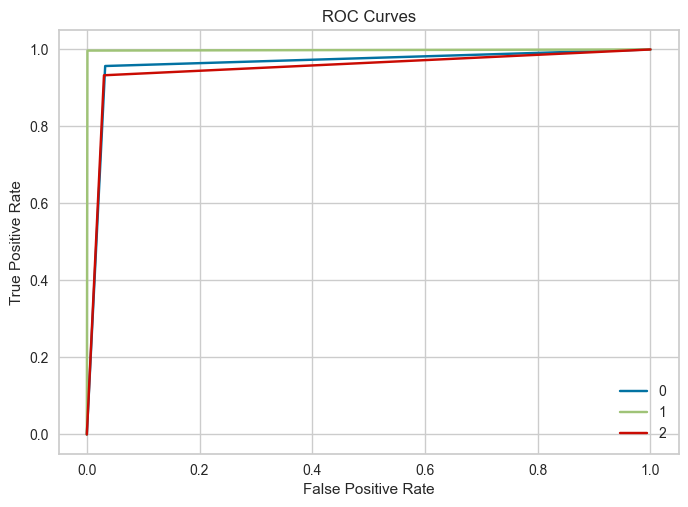

In [109]:
from sklearn.metrics import roc_auc_score, roc_curve

# calcola il punteggio ROC AUC per ogni classe
roc_auc_scores = []
for cl in range(3):
  y_true = y_test == cl # crea un array di valori booleani in cui True rappresenta l'appartenenza alla classe cl
  y_score = dtc.predict_proba(X_test_drop)[:, cl] # calcola le probabilità di appartenenza alla classe cl
  score = roc_auc_score(y_true, y_score) # calcola il punteggio ROC AUC
  roc_auc_scores.append(score)

print(roc_auc_scores)


# traccia le curve ROC per ogni classe
for cl, score in zip(range(3), roc_auc_scores):
  y_true = y_test == cl # crea un array di valori booleani in cui True rappresenta l'appartenenza alla classe cl
  y_score = dtc.predict_proba(X_test_drop)[:, cl] # calcola le probabilità di appartenenza alla classe cl
  fpr, tpr, thresholds = roc_curve(y_true, y_score) # calcola la FPR, la TPR e i thresholds
  plt.plot(fpr, tpr, label=cl)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

<h1>Random Forest</h1>

In [110]:
# Create the model
rf = RandomForestClassifier(criterion="entropy")

# Fit the model
rf.fit(X_train_class, y_train_class)

# Check the accuracy
y_predRF = rf.predict(X_test_drop)
accuracyRF = accuracy_score(y_test, y_predRF)
print(f"Accuracy: {accuracyRF:.2f}")

Accuracy: 0.98


Cross-Validation for Random Forest

In [111]:
# Use cross-validation to evaluate model accuracy
skf = StratifiedKFold(10, shuffle = True, random_state = 21)
scores = cross_val_score(rf, X, y, cv=skf)

print(f"Cross-validation scores: {scores}")
print(f"Mean score: { scores.mean()}")

Cross-validation scores: [0.979  0.9775 0.9778 0.9802 0.9768 0.9783 0.9778 0.9807 0.9774 0.9788]
Mean score: 0.97843


Here I compute the Confusion Matrix for the Random Forest algorithm


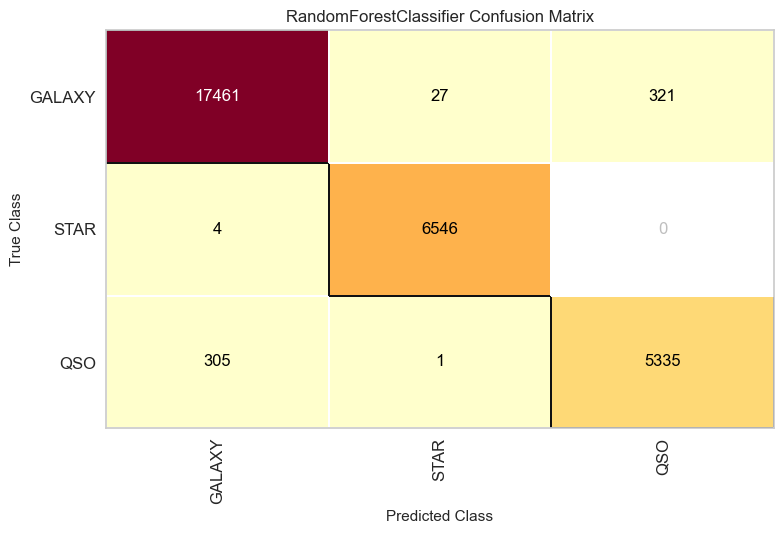


              precision    recall  f1-score   support

           0       0.98      0.98      0.98     17809
           1       1.00      1.00      1.00      6550
           2       0.94      0.95      0.94      5641

    accuracy                           0.98     30000
   macro avg       0.97      0.98      0.97     30000
weighted avg       0.98      0.98      0.98     30000



In [112]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predRF)

from yellowbrick.classifier import ConfusionMatrix
rf_cm = ConfusionMatrix(rf, classes=['GALAXY','STAR','QSO'])

rf_cm.fit(X_train_class, y_train_class)
rf_cm.score(X_test_drop, y_test)
rf_cm.show()

print()
print(classification_report(y_test, y_predRF))

In [113]:
# Estraiamo gli elementi della confusion matrix che ci serviranno per calcolare le metriche
tp0, tp1, tp2 = confusion_matrix[0, 0], confusion_matrix[1, 1], confusion_matrix[2, 2]
fn0, fn1, fn2 = confusion_matrix[0, 1] + confusion_matrix[0, 2], confusion_matrix[1, 0] + confusion_matrix[1, 2], confusion_matrix[2, 0] + confusion_matrix[2, 1]
fp0, fp1, fp2 = confusion_matrix[1, 0] + confusion_matrix[2, 0], confusion_matrix[0, 1] + confusion_matrix[2, 1], confusion_matrix[0, 2] + confusion_matrix[1, 2]
tn0 = confusion_matrix[1, 1] + confusion_matrix[1, 2] + confusion_matrix[2, 1] + confusion_matrix[2, 2]
tn1 = confusion_matrix[0, 0] + confusion_matrix[0, 2] + confusion_matrix[2, 0] + confusion_matrix[2, 2]
tn2 = confusion_matrix[0, 0] + confusion_matrix[0, 1] + confusion_matrix[1, 0] + confusion_matrix[1, 1]

# Calcoliamo le metriche
accuracy0 = (tp0 + tn0)/confusion_matrix.sum()
accuracy1 = (tp1 + tn1)/confusion_matrix.sum()
accuracy2 = (tp2 + tn2)/confusion_matrix.sum()
sensitivity0 = tp0 / (tp0 + fn0)
sensitivity1 = tp1 / (tp1 + fn1)
sensitivity2 = tp2 / (tp2 + fn2)
specificity0 = tn0 / (tn0 + fp0)
specificity1 = tn1 / (tn1 + fp1)
specificity2 = tn2 / (tn2 + fp2)

print(f"Accuracy (GALAXY): {accuracy0:.2f}")
print(f"Accuracy (STAR): {accuracy1:.2f}")
print(f"Accuracy (QUASAR): {accuracy2:.2f}")
print()
print(f"Sensitivity (GALAXY): {sensitivity0:.2f}")
print(f"Sensitivity (STAR): {sensitivity1:.2f}")
print(f"Sensitivity (QUASAR): {sensitivity2:.2f}")
print()
print(f"Specificity (GALAXY): {specificity0:.2f}")
print(f"Specificity (STAR): {specificity1:.2f}")
print(f"Specificity (QUASAR): {specificity2:.2f}")

Accuracy (GALAXY): 0.98
Accuracy (STAR): 1.00
Accuracy (QUASAR): 0.98

Sensitivity (GALAXY): 0.98
Sensitivity (STAR): 1.00
Sensitivity (QUASAR): 0.95

Specificity (GALAXY): 0.97
Specificity (STAR): 1.00
Specificity (QUASAR): 0.99


ROC Curve

[0.9947436505536176, 0.9997641953807841, 0.9922027809522598]


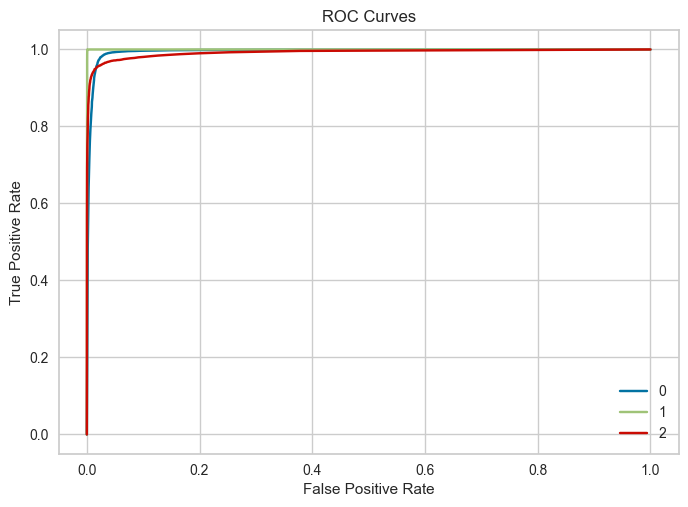

In [114]:
from sklearn.metrics import roc_auc_score, roc_curve

roc_auc_scores = []
for cl in range(3):
  y_true = y_test == cl
  y_score = rf.predict_proba(X_test_drop)[:, cl] # type: ignore
  score = roc_auc_score(y_true, y_score) 
  roc_auc_scores.append(score)

print(roc_auc_scores)


# Plot ROC curves for each class
for cl, score in zip(range(3), roc_auc_scores):
  y_true = y_test == cl # Creates an array of boolean values where True represents membership of the cl class
  y_score = rf.predict_proba(X_test_drop)[:, cl] # type: ignore
  fpr, tpr, thresholds = roc_curve(y_true, y_score) # Calculate FPR, TPR and thresholds
  plt.plot(fpr, tpr, label=cl)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

<h2>Bayesian Classifier</h2>

In [115]:
from sklearn.naive_bayes import GaussianNB
from scipy.stats import pearsonr

# Create the model
gnb = GaussianNB()

# Fit the model
gnb.fit(X_train_class, y_train_class)

# Check the accuracy
y_predBC = gnb.predict(X_test_drop)
accuracyBC = accuracy_score(y_test, y_predBC)
print(f"Accuracy: {accuracyBC:.2f}")

Accuracy: 0.31


In [117]:
# Use cross-validation to evaluate model accuracy
skf = StratifiedKFold(10, shuffle = True, random_state = 21)
scores = cross_val_score(gnb, X, y, cv=skf)

# Stampa i risultati della cross-validation
print(f"Cross-validation scores: {scores}")
print(f"Mean score: { scores.mean()}")

Cross-validation scores: [0.6038 0.6052 0.6014 0.6006 0.599  0.6008 0.6053 0.6004 0.5985 0.6024]
Mean score: 0.6017399999999999


Confusion Matrix


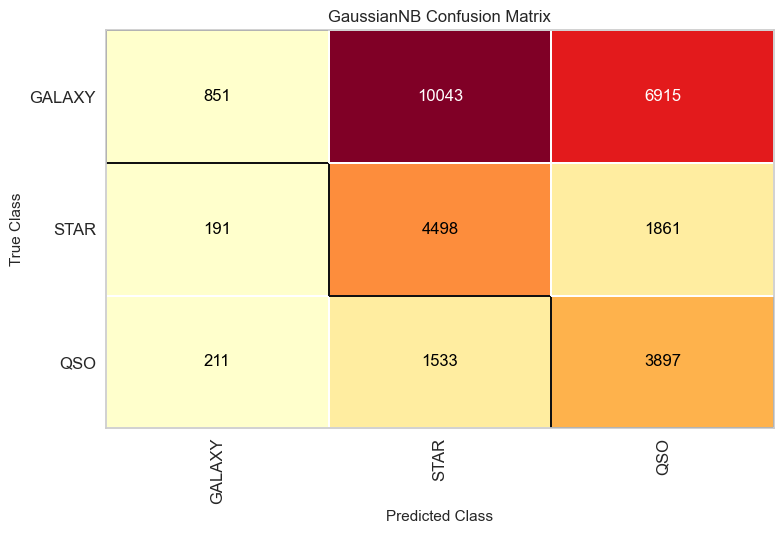


              precision    recall  f1-score   support

           0       0.68      0.05      0.09     17809
           1       0.28      0.69      0.40      6550
           2       0.31      0.69      0.43      5641

    accuracy                           0.31     30000
   macro avg       0.42      0.48      0.30     30000
weighted avg       0.52      0.31      0.22     30000



In [118]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predBC)

from yellowbrick.classifier import ConfusionMatrix
rf_cm = ConfusionMatrix(gnb, classes=['GALAXY','STAR','QSO'])

rf_cm.fit(X_train_class, y_train_class)
rf_cm.score(X_test_drop, y_test)
rf_cm.show()

print()
print(classification_report(y_test, y_predBC))

In [119]:
# Estraiamo gli elementi della confusion matrix che ci serviranno per calcolare le metriche
tp0, tp1, tp2 = confusion_matrix[0, 0], confusion_matrix[1, 1], confusion_matrix[2, 2]
fn0, fn1, fn2 = confusion_matrix[0, 1] + confusion_matrix[0, 2], confusion_matrix[1, 0] + confusion_matrix[1, 2], confusion_matrix[2, 0] + confusion_matrix[2, 1]
fp0, fp1, fp2 = confusion_matrix[1, 0] + confusion_matrix[2, 0], confusion_matrix[0, 1] + confusion_matrix[2, 1], confusion_matrix[0, 2] + confusion_matrix[1, 2]
tn0 = confusion_matrix[1, 1] + confusion_matrix[1, 2] + confusion_matrix[2, 1] + confusion_matrix[2, 2]
tn1 = confusion_matrix[0, 0] + confusion_matrix[0, 2] + confusion_matrix[2, 0] + confusion_matrix[2, 2]
tn2 = confusion_matrix[0, 0] + confusion_matrix[0, 1] + confusion_matrix[1, 0] + confusion_matrix[1, 1]

# Calcoliamo le metriche
accuracy0 = (tp0 + tn0)/confusion_matrix.sum()
accuracy1 = (tp1 + tn1)/confusion_matrix.sum()
accuracy2 = (tp2 + tn2)/confusion_matrix.sum()
sensitivity0 = tp0 / (tp0 + fn0)
sensitivity1 = tp1 / (tp1 + fn1)
sensitivity2 = tp2 / (tp2 + fn2)
specificity0 = tn0 / (tn0 + fp0)
specificity1 = tn1 / (tn1 + fp1)
specificity2 = tn2 / (tn2 + fp2)

print(f"Accuracy (GALAXY): {accuracy0:.2f}")
print(f"Accuracy (STAR): {accuracy1:.2f}")
print(f"Accuracy (QUASAR): {accuracy2:.2f}")
print()
print(f"Sensitivity (GALAXY): {sensitivity0:.2f}")
print(f"Sensitivity (STAR): {sensitivity1:.2f}")
print(f"Sensitivity (QUASAR): {sensitivity2:.2f}")
print()
print(f"Specificity (GALAXY): {specificity0:.2f}")
print(f"Specificity (STAR): {specificity1:.2f}")
print(f"Specificity (QUASAR): {specificity2:.2f}")

Accuracy (GALAXY): 0.42
Accuracy (STAR): 0.55
Accuracy (QUASAR): 0.65

Sensitivity (GALAXY): 0.05
Sensitivity (STAR): 0.69
Sensitivity (QUASAR): 0.69

Specificity (GALAXY): 0.97
Specificity (STAR): 0.51
Specificity (QUASAR): 0.64


ROC Curve

[0.5612085391797124, 0.6099047901170267, 0.719563721240364]


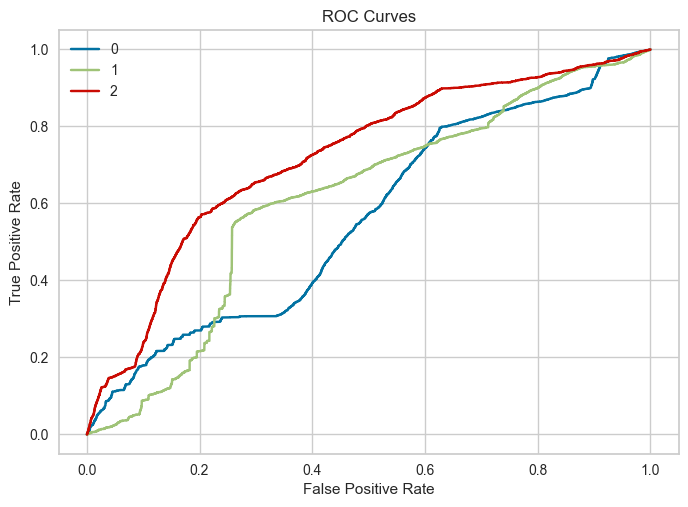

In [51]:
from sklearn.metrics import roc_auc_score, roc_curve

# calcola il punteggio ROC AUC per ogni classe
roc_auc_scores = []
for cl in range(3):
  y_true = y_test == cl # crea un array di valori booleani in cui True rappresenta l'appartenenza alla classe cl
  y_score = gnb.predict_proba(X_test_drop)[:, cl] # calcola le probabilità di appartenenza alla classe cl
  score = roc_auc_score(y_true, y_score) # calcola il punteggio ROC AUC
  roc_auc_scores.append(score)

print(roc_auc_scores)


# traccia le curve ROC per ogni classe
for cl, score in zip(range(3), roc_auc_scores):
  y_true = y_test == cl # crea un array di valori booleani in cui True rappresenta l'appartenenza alla classe cl
  y_score = gnb.predict_proba(X_test_drop)[:, cl] # calcola le probabilità di appartenenza alla classe cl
  fpr, tpr, thresholds = roc_curve(y_true, y_score) # calcola la FPR, la TPR e i thresholds
  plt.plot(fpr, tpr, label=cl)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

<h1 style="font-weight: bold">Save The Model<h1>

<p style="size: 12pt">I'll save the model of Random Forest in a file, for using them in an external application</p>

In [120]:
with open('starClassificationApp/model.pkl', 'wb') as f:
    pickle.dump(rf, f)